# Comprehensive Confidence Intervals for Python Developers

Variantions of different confidence intervals, their assumptions, strength and weakness, when to use, and when not to use. 

> **Confidence interval** is uncertainty in summary statistic represented as a range. In the other words, it is a range of values we are fairly sure our true value lies in. For example: I am 95% confident that the population mean falls between 8.76 and 15.88 $\rightarrow$ (12.32 $\pm$ 3.56)

Confidence interval tells you how confident you can be that the results from a poll or survey reflect what you would expect to find if it were possible to survey the entire population. It is difficult to obtain measurement data of an entire data set (*population*) due to limited resource & time. Your best shot is to survey a small fraction (*samples*) of the entire data set, and pray that your sample data represents the population reasonably well. 

Sample data may not be a good representation of a population by numerous factors (Ex: bias), and as a result, uncertainty is always introduced in any estimations derived from sample data. **Due to the uncertainty involved with sample data, any statistical estimation needs to be delivered in a range, not in a point estimate**.

How well a sample statistic estimates an underlying population parameter is always an issue (<a href="#population_vs_samples">Population vs. Samples</a>). A confidence interval addresses this issue by providing a range of values, which is likely to contain the population parameter of interest.

<div id="toc_container">
    <p class="toc_title">Contents</p>
    <ul class="toc_list">
        <li>
            <a href="#Understanding confidence interval with analogy"><span class="toc_label">1</span>Understanding
                confidence interval with analogy</a>
            <ul>
                <li><a href="#Uncertainty in rock porosity"><span class="toc_label">Example 1:</span>Uncertainty in rock
                    porosity</a></li>
                <li><a href="#Purity of methamphetamine (crystal) in Breaking Bad"><span
                        class="toc_label">Example 2:</span>Purity of methamphetamine (crystal) in Breaking Bad</a></li>
            </ul>
        </li>
        <li><a href="#quick-highlights"><span class="toc_label">2</span>Key takeaways</a></li>
        <li><a href="#population_vs_samples"><span class="toc_label">3</span>Population vs Samples</a></li>
        <ul>
            <li><a href="#sample_pop_var"><span class="toc_label">Notes:</span>Population variance $\sigma^2$ vs.
                Sample variance $s^2$</a></li>
            <li><a href="#python_variance"><span class="toc_label">Pythonic Tip:</span>Difference between Numpy variance
                and Pandas variance</a></li>
        </ul>
        <li><a href="#Confidence interval of different statistics"><span class="toc_label">4</span>Confidence interval
            of normal distribution</a></li>
        <ul>
            <li><a href="#conf_int_of_mean"><span class="toc_label">4.1</span>Confidence interval of mean</a></li>
            <ul>
                <li><a href="#dist_stats"><span class="toc_label">Notes:</span>Distribution of various statistics</a>
                </li>
                <li><a href="#t_vs_z"><span class="toc_label">Notes:</span>z-score vs t-score</a></li>
                <li><a href="#python_ci_mean"><span class="toc_label">Pythonic Tip:</span>Computing confidence interval of mean with SciPy</a></li>
            </ul>
            <li><a href="#conf_int_of_diff_in_mean"><span class="toc_label">4.2</span>Confidence interval of difference
                in mean</a></li>
            <ul>
                <li><a href="#anova"><span class="toc_label">Notes:</span>Comparing means of more than two samples with ANOVA</a></li>
                <li><a href="#ind_equal"><span class="toc_label">4.2.1</span>Independent (unpaired) samples, equal
                    variance - Student's t-interval</a></li>
                <ul>
                    <li><a href="#python_ind_equal"><span class="toc_label">Pythonic Tip:</span>Computing student's t-interval</a></li>
                </ul>
                <li><a href="#ind_unequal"><span class="toc_label">4.2.2</span>Independent (unpaired) samples, unequal variance - Welch's t-interval</a></li>
                <ul>
                    <li><a href="#python_ind_unequal"><span class="toc_label">Pythonic Tip:</span>Computing Welch's t-interval</a></li>
                </ul>
                <li><a href="#dep"><span class="toc_label">4.2.3</span>Dependent (paired) samples - Paired t-interval</a></li>
                <ul>
                    <li><a href="#python_dep"><span class="toc_label">Pythonic Tip:</span>Computing paired t-interval</a></li>
                </ul>
                <li><a href="#which_to_use"><span class="toc_label">Notes:</span>Deciding which t-test to use</a></li>
            </ul>
            <li><a href="#conf_int_of_var"><span class="toc_label">4.3</span>Confidence interval of variance</a></li>
            <ul>
                <li><a href="#chi_square"><span class="toc_label">Notes:</span>Chi-square $\chi^2$ distribution</a></li>
                <li><a href="#one_tail_two_tail"><span class="toc_label">Notes:</span>One-tail vs two-tail</a></li>
                <li><a href="#python_ci_var"><span class="toc_label">Pythonic Tip:</span>Computing confidence interval of variance with SciPy</a></li>
            </ul>
            <li><a href="#conf_int_of_other"><span class="toc_label">4.4</span>Confidence interval of other statistics: Bootstrap</a></li>
            <li><a href="#"><span class="toc_label">4.5</span>Confidence interval of regression</a></li>
            <li><a href="#"><span class="toc_label">4.6</span>Two-tailed vs one-tailed interval</a></li>
            <li><a href="#robustness"><span class="toc_label">Notes:</span>Robustness of confidence interval to non-normality</a></li>
        </ul>
        <li><a href="#conf_int_non_normal"><span class="toc_label">5</span>Confidence interval of non-normal
            distribution</a></li>
        <ul>
            <li><a href="#"><span class="toc_label">5.1</span>Comparing central tendency of populations</a></li>
                <ul>
                    <li><a href="#"><span class="toc_label">5.1.1</span>Confidence interval of median: Mann-Whitney U test</a></li>
                </ul>
            <li><a href="#"><span class="toc_label">5.2</span>Credible interval</a></li>
            <li><a href="#"><span class="toc_label">5.3</span>Transform to normal distribution with Box-Cox</a></li>
            <li><a href="#"><span class="toc_label">5.4</span>Bootstrapping</a></li>
                <ul>
                    <li><a href="#"><span class="toc_label">5.4.1</span>Bootstrap CI of statistics</a></li>
                    <li><a href="#"><span class="toc_label">5.4.1</span>Bootstrap CI of difference in statistics</a></li>
                </ul>
        </ul>
        <li><a href="#"><span class="toc_label">6</span>FAQ's</a></li>
        <ul>
            <li><a href="#"><span class="toc_label">6.1</span>What is confidence level?</a></li>
            <li><a href="#"><span class="toc_label">6.2</span>What is significance level?</a></li>
            <li><a href="#"><span class="toc_label">6.3</span>What is margin of error?</a></li>
            <li><a href="#"><span class="toc_label">6.4</span>What is degrees of freedom?</a></li>
            <li><a href="#"><span class="toc_label">6.5</span>Non-normality and outliers</a></li>
            <li><a href="#"><span class="toc_label">6.6</span>kurtosis</a></li>
        </ul>
        <li><a href="#"><span class="toc_label">7</span>Worked Python examples</a></li>
    </ul>
</div>
Prediction interval vs Confidence interval

<div id="Understanding confidence interval with analogy"></div>

## 1. Understanding confidence interval with analogy

If you've taken a science class with lab reports in your highschool or college, you probably had to include measurement error in your lab reports. For example, if you were asked to measure the length of a paper clip with a ruler, you have to include $\pm0.5 \,\text{cm}$ or $\pm0.05\,\text{cm}$ (depending on the spacing of tick marks) to account for the measurement error that shows the precision of your measuring tool. 

Based on <a href="#fig1">figure (1)</a>, the paper clip seems to be about 2.7 cm long, but we don't know for sure because the tickmarks in the ruler is not precise enough to measure decimal length. However, I can tell with 100% confidence that the paper clip has a length between 2 ~ 3 cm, because the clip is between 2cm and 3cm tickmarks. You record the length of the paper clip in a *range*, instead of a *point estimate*, to account for the uncertainty introduced by the limitation of the measuring tool.

<div id="fig1" class="row give-margin-inline-big-plot mobile_responsive_plot_full_width" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_int_ruler.png"></div>
    <div class="col-12"><p class="image-description">Figure 1: Measurement error in ruler</p></div>
</div>

Similar idea can be applied to a <a href="#conf_int_of_mean">confidence interval of mean</a>. You want to obtain a mean of a whole data set (*population*), but you can measure values of only a small fraction (*samples*) of the whole data set. This boils down to the traditional issue of <a href="#population_vs_samples">Sample vs Population</a>, due to the cost of obtaining measurement data of a large data set. Uncertainty is introduced in your samples, because you don't know if your samples are 100% representative of the population, free of bias. Therefore, you deliver your conclusion in a range, not in a point estimate, to account for the uncertainty.

<div><hr></div>

<div id="Uncertainty in rock porosity"></div>
<p style="color: #666"><b>Example 1:</b> Uncertainty in rock porosity<p>

A reservoir engineer in the oil & gas industry wants to know the rock porosity of a formation to estimate the total oil reserve 9,500 ft underground. Due to the high cost of obtaining rock core samples from the deep formations, he could acquire only 12 rock core samples. Since the uncertainty of a point estimation scales inversely with a sample size, his estimation is subject to non-negligible uncertainty. He obtains 14.5% average rock porosity with 4.3% standard deviation. Executives in the company wants to know the worst-case scenario and the best-case scenario to make business decisions. You can convey your estimation of average porosity with uncertainty by constructing the <a href="#conf_int_of_mean">confidence interval of mean</a>.

Assuming that you have a reason to believe that the rock porosity follows normal distribution, you can construct its 80% confidence interval, with the procedure described <a href="#python_ci_mean"> below</a>:

<div style="margin-bottom: -20px"></div>

In [133]:
stats.t.interval(1 - 0.2, 12 - 1, loc=14.5, scale= 4.3 / np.sqrt(12))

(12.807569748569543, 16.19243025143046)

<div style="margin-top: -20px"></div>

In the worst-case scenario, the rock formation at 9,500 ft underground has 12.8% porosity. In the best-case scenario, the oil reservoir has 16.2% porosity. The same procedures can be applied for the core samples collected at different depths, which give us the confidence interval plot of rock porosities shown in <a href="#">figure (2)</a>.

<div id="fig2" class="row give-margin-inline-big-plot mobile_responsive_plot_full_width" style="">
    <div class="col"><img src="jupyter_images/rock_por_conf_no_title.png"></div>
    <div class="col-12"><p class="image-description">Figure 2: Confidence interval of core samples porosities along depths</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (2)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
                import numpy as np
                from scipy import stats
                import matplotlib.pyplot as plt

                np.random.seed(39)

                depth = [i * 10 + 8000 for i in range(100)]
                l = len(depth)
                avg_por = []
                p10_por = []
                p90_por = []
                for i, item in enumerate(depth):

                    # You collect 12 rock core samples for each depth
                    # Assume that sample porosity follows a normal distribution
                    sample_size = 12
                    por_samples = np.random.normal(loc=0.15 - i/2000, scale=0.022, size=sample_size)
                    avg_por.append(np.mean(por_samples))
                    
                    # 80% confidence interval of mean
                    p10, p90 = stats.t.interval(1 - 0.2, sample_size - 1, loc=np.mean(por_samples), scale=stats.sem(por_samples))
                    p10_por.append(p10)
                    p90_por.append(p90)
                
                # plotting
                plt.style.use('seaborn-whitegrid')
                fig, ax = plt.subplots(1, 2, figsize=(8, 4))

                ax[0].plot(avg_por[:l//2], depth[:l//2], 'k', label='P50', alpha=0.8)
                ax[0].plot(p10_por[:l//2], depth[:l//2], 'grey', linewidth=0.7, label='P10', linestyle='--')
                ax[0].plot(p90_por[:l//2], depth[:l//2], 'grey', linewidth=0.7, label='P90')

                ax[0].set_xlim(0.08, 0.17)
                ax[0].set_ylabel('Depth (ft)', fontsize=15)
                ax[0].set_xlabel('Porosity', fontsize=15)
                ax[0].fill_betweenx(depth[:l//2], p10_por[:l//2], p90_por[:l//2], facecolor='lightgrey', alpha=0.3)
                ax[0].invert_yaxis()

                ax[1].plot(avg_por[l//2:], depth[l//2:], 'k', label='P50', alpha=0.8)
                ax[1].plot(p10_por[l//2:], depth[l//2:], 'grey', linewidth=0.7, label='P10', linestyle='--')
                ax[1].plot(p90_por[l//2:], depth[l//2:], 'grey', linewidth=0.7, label='P90')

                ax[1].set_xlim(0.08, 0.17)
                ax[1].set_xlabel('Porosity', fontsize=15)
                ax[1].legend(loc='best', fontsize=14, framealpha=1, frameon=True)
                ax[1].fill_betweenx(depth[l//2:], p10_por[l//2:], p90_por[l//2:], facecolor='lightgrey', alpha=0.3)
                ax[1].invert_yaxis()
            </code>
        </pre>
    </div>
</div>

<div><hr></div>

<div id="Purity of methamphetamine (crystal) in Breaking Bad"></div>
<p style="color: #666"><b>Example 2:</b> Purity of methamphetamine (crystal) in Breaking Bad<p>

21 batches of crystal cooked by Mr. White shows 99.1% average purity with 3% standard deviation. 18 batches of crystal cooked by Mr. Pinkman shows 96.2% average purity with 4% standard deviation. Does Mr. White always cook better crystal than Mr. Pinkman, or is it possible for Mr. Pinkman to beat Mr. White in purity of cooked crystals, by luck?

We can construct 95% confidence interval assuming normal distribution, with the procedure described <a href="#python_ci_mean"> below</a>:

<div style="margin-bottom: -20px"></div>

In [78]:
# Mr. White's

stats.t.interval(1 - 0.05, 21 - 1, loc=99.1, scale= 3 / np.sqrt(21))

(97.73441637228476, 100.46558362771523)

In [79]:
# Mr. Pinkman's

stats.t.interval(1 - 0.05, 18 - 1, loc=96.2, scale= 4 / np.sqrt(18))

(94.21084679714819, 98.18915320285181)

<div style="margin-top: -20px"></div>

There's a small overlap between the confidence intervals of Mr. White's and Mr. Pinkman's. Although it is true that Mr. White is a better cooker, Mr. Pinkman can cook a purer batch of crystals by a small chance, if he has the luck. Comparing the means of two sample data sets is closely related to constructing <a href="#conf_int_of_diff_in_mean">confidence interval of difference in mean</a>.

<div id="fig2" class="row full_screen_margin_md mobile_responsive_plot_full_width" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/crystal_purity.png"></div>
    <div class="col-12"><p class="image-description">Figure 3: Overlap in the 95% confidence interval of two samples</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (3)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
                import matplotlib.pyplot as plt
                from scipy import stats
                import numpy as np

                conf_pinkman = stats.t.interval(1 - 0.05, 18 - 1, loc=96.2, scale= 4 / np.sqrt(18))
                conf_white = stats.t.interval(1 - 0.05, 21 - 1, loc=99.1, scale= 3 / np.sqrt(21))

                plt.style.use('seaborn-whitegrid')
                fig, ax = plt.subplots(figsize=(5, 2))

                ax.errorbar(99.1, 1, xerr=(conf_white[1] - conf_white[0]) / 2, 
                            fmt='o', markersize=8, capsize=5, label='Mr. White\'s', color='grey')
                ax.errorbar(96.2, 0, xerr=(conf_pinkman[1] - conf_pinkman[0]) / 2, 
                            fmt='o', markersize=8, capsize=5, label='Mr. Pinkman\'s', color='k')
                ax.set_ylim(-0.6, 1.6)
                ax.fill_betweenx([1, 0], conf_white[0], conf_pinkman[1], facecolor='lightgrey', alpha=0.3)
                ax.legend(loc='best', fontsize=11, framealpha=1, frameon=True)
                ax.set_xlabel('Purity (%)', fontsize=12)
                ax.yaxis.set_major_formatter(plt.NullFormatter())
                fig.tight_layout();
            </code>
        </pre>
    </div>
</div>

<div id="quick-highlights"></div>

## 2. Key takeaways

<div class="highlights" id="key1">
    <div class="highlights-title">1. Confidence interval quantifies uncertainty of statistical estimation</div>
    <div class="highlights-content">Confidence interval qunatifies the uncertainty related to a statistical estimation to mitigate the issue of <a href="#population_vs_samples">Population vs. Samples</a>. It is always expressed in a range like — $\text{C.I.}: \quad \bar{x} \pm 3.43$ or $-51.4 < \bar{x} < -43.2$</div>
</div>

<div class="highlights" id="key2">
    <div class="highlights-title">2. Confidence interval is the basis of parametric hypothesis tests</div>
    <div class="highlights-content">Confidence interval is the basis of parametric hypothesis tests. For example, <a href="https://www.investopedia.com/terms/t/t-test.asp" target="_blank">t-test</a> computes its p-value using the <a href="#conf_int_of_diff_in_mean">confidence interval of difference in mean</a>. When samples follow a normal distribution, and therefore their <a href="#central_tendency">centeral tendency</a> can be described by their means, t-test can be used to conclude if two distributions are significantly different from each other. 
    </div>
</div>

<div class="highlights" id="key3">
    <div class="highlights-title">3. Formula for confidence interval varies with statistics</div>
    <div class="highlights-content">
        <p>For <a href="#conf_int_of_mean">confidence interval of mean</a></p>
        <p><div style="font-size: 1rem; margin-top: 20px;">$$ \text{C.I.}_{\text{mean}}: \quad \mu \pm (t_{\frac{\alpha}{2},df} \times \frac{s}{\sqrt{n}})$$</div></p>
        <p>For <a href="#conf_int_of_diff_in_mean">confidence interval of difference in mean</a></p>
        <p><div style="font-size: 1rem; margin-top: 20px;">$$ \text{C.I.}_{\Delta \text{mean}}: \quad (\mu_{1}- \mu_{2}) \pm (t_{1-\frac{\alpha}{2},df} \times \sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}})$$</div></p>    
        <p>For confidence interval of proportion</p>
        <p><div style="font-size: 1rem; margin-top: 20px;">$$ \text{C.I.}_{\text{proportion}}: \quad \hat{p} \pm (t_{\frac{\alpha}{2},df} \times \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} )$$</div></p>
        <p>For <a href="#conf_int_of_var">confidence interval of variance</a></p>
        <p><div style="font-size: 1rem; margin-top: 20px;">$$ \text{C.I.}_{\text{variance}}: \frac{(n-1)s^{2}}{\chi^{2}_{\frac{\alpha}{2}}} \leq \sigma^2 \leq \frac{(n-1)s^{2}}{\chi^{2}_{1-\frac{\alpha}{2}}}$$</div></p>
        <p>For confidence interval of standard deviation</p>
        <p><div style="font-size: 1rem; margin-top: 20px;">$$ \text{C.I.}_{\text{standard deviation}}: \sqrt{\frac{(n-1)s^{2}}{\chi^{2}_{\frac{\alpha}{2}}}} \leq \sigma \leq \sqrt{\frac{(n-1)s^{2}}{\chi^{2}_{1-\frac{\alpha}{2}}}}$$</div></p>
        <p>Different analytical solutions exist for different statistics. However, confidence interval for many other statistics cannot be analytically solved, simply because there are no formulas for them. If the statistic of your interest does not have an analytical solution for its confidence interval, or you simply don't know it, numerical methods like <a href="https://aegis4048.github.io/non-parametric-confidence-interval-with-bootstrap" target="_blank">boostrapping</a> can be a good alternative (and its powerful).</p>
    </div>
</div>

<div class="highlights" id="key4">
    <div class="highlights-title">4. Things are VERY different if sample data set is not normally distributed</div>
    <div class="highlights-content">The equations listed above <b>are not valid if sample data set is not normally distributed</b>. In case of non-normally distributed data, its confidence interval can be obatined with non-parametric methods like <a href="https://aegis4048.github.io/non-parametric-confidence-interval-with-bootstrap" target="_blank">boostrapping</a>, or instead use <a href="#">credible interval</a>, which is a Baysian equivalent of confidence interval. Or you can transform your data into normal distribution using <a href="https://aegis4048.github.io/transforming-non-normal-distribution-to-normal-distribution" target="_blank">Box-Cox transformation</a>.</div>
</div>

<div class="highlights" id="key5">
    <div class="highlights-title">5. 95% C.I. does not mean 95% of the sample data lie within the interval.</div>
    <div class="highlights-content">It means that there's 95% chance that the estimated statistic falls within the interval. 95% confidence interval relates to the reliability of the estimation procedure. Ex: How reliable is your estimation of population variance?</div>
</div>

<div class="highlights" id="key6">
    <div class="highlights-title">6. Always use t-score instead of z-score</div>
    <div class="highlights-content">When constructing confidence interval of mean, or running t-test, always use t-score instead of z-score. This is described in detail <a href="#t_vs_z">below</a>.</div>
</div>

<div class="highlights" id="key7">
    <div class="highlights-title">7. Bigger sample size gives narrower confidence intervals</div>
    <div class="highlights-content">Intuitively, this is because the more samples we have, the less uncertainty we have with our statistical estimation. Mathematically, this is because the the confidence interval is inversely related to the sample size $n$, as shown in <a href="#eq-1">eq (1)</a>.</div>
</div>

<div class="highlights" id="key8">
    <div class="highlights-title">8. Means are not always equivalent to central tendency</div>
    <div class="highlights-content">When samples are not normally distributed, their means are not a good measure of their <a href="#central_tendency">centeral tendencies</a>. For example, if you are comparing the means of two non-normal data sets with t-test to conclude if they came from the same population, your approach is wrong. The more viable alternative would be to use non-parametric alternatives that uses median, or other statistics that capture the central tendency of non-normal distributions.</div>
</div>

<div id="population_vs_samples"></div>

## 3. Population vs. samples

Confidence interval describes the amount of uncertainty associated with a sample estimate of a population parameter. One needs to have a good understanding of the difference between samples and population to understand the necessity of delivering statistical estimations in a range, a.k.a. confidence interval.

<div id="fig1" class="row give-margin-inline-big-plot mobile_responsive_plot_full_width" style="
    margin-top: 10px;
">
    <div class="col"><img src="jupyter_images/conf_int_sample_pops.png"></div>
    <div class="col-12"><p class="image-description">Figure 1: Population vs samples</p></div>
</div>

> **Population**: data set that contains all members of a specified group. Ex: ALL people living in the US.

> **Samples**: data set that contains a part, or a subset, of a population Ex: SOME people living in the US.

<div><hr></div>

Let's say that you are conducting a phone-call survey to investigate the society's perception of The Affordable Care Act (“Obamacare”). Since you can't call all 327.2 million people (*population*) in the US, you call about 1,000 people (*samples*). Your poll showed that 59% of the registered voters support Obamacare. This does not agree with the actual survey conducted in 2018; 53% favorable, 42% unfavorable (<a href="http://www.msnbc.com/rachel-maddow-show/poll-shows-support-obamacare-reaching-all-time-high" target="_blank">source</a>). What could be the source of error? 

Since (formal) president Obama is a member of the Democratic Party, the voters' response can be affected by their political preference. How could you tell that the 1,000 people you called happened to be mostly Democrats, who's more likely to support Obama's policy, because they share similar political view? The samples you collected could have been *biased*, but you don't that know for sure. Of course, the voters' response could be affected by many other factors like race, age, place of residence, or financial status. The idea is that, there will always be uncertainty involved with your estimation, because you don't have an access to the entire population.  

Confidence interval is a technique that quantifies the uncertainty when estimating a population parameter from samples.

<div id="sample_pop_var"></div>

<div class="alert alert-info">
    <h4>Notes: Population variance $\sigma^2$ vs. Sample variance $s^2$</h4>
    <p>Distinction between population parameter and sample parameter is important. In statistics, it is a common practice to denote population variance as $\sigma^2$, and sample variance as $s^2$. The distinction is important because different equations are used for each.</p>
    <p>For population:</p>
    <p><div style="font-size: 1rem; margin-top: 20px;">$$ \text{variance} = \sigma^2 = \frac{\sum(x - \bar{x})^2}{n} $$</div></p>
    <p>For samples:</p>
    <p><div style="font-size: 1rem; margin-top: 20px;">$$ \text{variance} = s^2 = \frac{\sum(x - \bar{x})^2}{n-1} $$</div></p>
    <p>The divisor $n-1$ is a correction factor for bias. Note that the correction has a larger proportional effect when $n$ is small than when $n$ is large, which is what we want because the more samples we have, the better the estimation. This idea is well explained on this <a href="https://stats.stackexchange.com/questions/3931/intuitive-explanation-for-dividing-by-n-1-when-calculating-standard-deviation" target="_blank">StackExchange thread</a>.</p>
</div>

<div><hr></div>

<div id="python_variance"></div>
<p style="color: #666"><b>Pythonic Tip:</b> Difference between Numpy variance and Pandas variance<p>

Different libraries make different assumption about an input array. The default value of <code>ddof</code> is different for Pandas and Numpy, resulting in different variance. <code>ddof</code> represent degrees of freedom, and setting <code>ddof=True</code> or <code>ddof=1</code> tells the variance function to calculate sample variance by accounting for the bias factor $n-1$ (recall that in Python, <code>True==1</code>.) Remember that there is a distinction between <a href="#sample_pop_var">Population variance ($\sigma^2$) vs. Sample variance ($s^2$).</a>

If you are confused which library is computing which variance (sample or population), just remember this: whatever library you are using, use <code>ddof=True</code> or <code>ddof=1</code> to compute sample variance, and use <code>ddof=False</code> or <code>ddof=0</code> to compute population variance.
<div style="margin: -20px"></div>

In [1]:
import numpy as np
import pandas as pd

arr = pd.DataFrame([5,3,1,6])

In [7]:
# numpy, population
arr.values.var()

3.6875

In [8]:
# numpy, sample
arr.values.var(ddof=1)

4.916666666666667

In [10]:
# pandas, population
arr.var(ddof=0)

0    3.6875
dtype: float64

In [99]:
# pandas, sample
arr.var()

0    4.916667
dtype: float64

<div id="Confidence interval of different statistics"></div>

## 4. Confidence interval of normal distribution

Computing confidence interval of a statistic depends on two factors: type of statistic, and type of sample distribution. As explained <a href="#quick-highlights">above</a>, different formulas exist for different type of statistics (Ex: mean, std, variance), and different methods (Ex: <a href="https://aegis4048.github.io/non-parametric-confidence-interval-with-bootstrap" target="_blank">boostrapping</a>, <a href="#">credible interval</a>, <a href="https://aegis4048.github.io/transforming-non-normal-distribution-to-normal-distribution" target="_blank">Box-Cox transformation</a>) are used for non-normal data set. 

We will cover confidence interval of mean, difference in mean and variance.

<div id="conf_int_of_mean"></div>

### 4.1. Confidence interval of mean

Confidence interval of mean is used to estimate the population mean from sample data and quantify the related uncertainty. Consider the following figure:

<div id="fig3" class="row give-margin-inline-big-plot mobile_responsive_plot_full_width" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_pop_dist.png"></div>
    <div class="col-12"><p class="image-description">Figure 3: Distribution of population and C.I. of mean</p></div>
</div>

In <a href="#fig3">figure (3)</a>, assume that the population is normally distributed. Since we don't have an excess to the entire population, we have to guess the <span style="color: #ed7d32; font-weight: 500;">population mean (unknown)</span> to the best of our ability using sample data set. We do this by computing the <span style="color: #70ad47; font-weight: 500;">sample mean</span> and constructing its <span style="color: #385624; font-weight: 500;">95% confidence interval</span>. Note that the popular choices of <a href="#">confidence levels</a> are: 90%, 95%, and 99%

Assuming normality of population, its sample means are also normally distributed. Let's say that you have a population, and you draw small fractions of it $N$ times. Then, the computed means of $N$ sample sets $\boldsymbol{\mu}=(\mu_1, \mu_2,..., \mu_{N-1}, \mu_N)$ is normally distributed as shown in <a href="#fig4">figure (4)</a>. Their confidence intervals are represented as the black horizontal arrows:.

<div id="fig4" class="row give-margin-inline-big-plot mobile_responsive_plot_full_width" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_int_mean.png"></div>
    <div class="col-12"><p class="image-description">Figure 4: Distribution of sample mean and its C.I.</p></div>
</div>

You can see that the confidence interval of <span style="color: red; font-weight: 500;">$\mu_5$</span> does NOT include the <span style="color: #70ad47; font-weight: 500;">green vertical dashed line</span>, 12.31. Let's assume that 12.31 is the true population mean (we never know if this is the actual population mean or not, but let's assume). If we get <span style="color: red; font-weight: 500;">$\mu_5$</span> and its confidence interval as our estimation of the population mean, then our estimation is wrong. There is a 5% chance of this happening, because we set our confidence level as 95%. Note that the width of the confidence intervals (black horizontal arrows) depend on the sample size, as shown in <a href="#eq-1">eq (1)</a>

The grey area of <a href="#fig3">figure (3)</a> is essentially equivalent to the grey area of <a href="#fig4">figure (4)</a>. $\mu_1$ = 12.32 is the sample mean, and $\pm$ 3.56 is the uncertainty related to the sample mean with 95% confidence. The uncertainty is a product of distribution score and standard error of mean. Distribution score essentially tells how many standard error are the limits (8.76 and 15.88) away from the center (12.32). Choosing larger confidence level results in larger confidence interval. This increases the grey area in <a href="#fig3">figure (3)</a> and <a href="#fig4">figure (4)</a>. 

We convey 95% confidence interval of mean like this:

> I am 95% confident that the population mean falls between 8.76 and 15.88. If I sample data 20 times, 19 times the sample mean will fall between 8.76 ~ 15.88, but expect that I will be wrong 1 time.

<div id="dist_stats"></div>
<div class="alert alert-info">
    <h4>Notes: Distribution of various statistics</h4>
    <p>Different statistics exhibit different distributions. Normality of samples does not guarantee normality of its statistics. When the samples are normally distributed, their means are normally distributed, but their variances are chi-square <span style="font-size: 90% !important">$\chi^2$</span> distributed. More discussion about the distribution of variance and <span style="font-size: 90% !important">$\chi^2$</span> distribution is covered <a href="#chi_square">below</a>. Note that these assumptions are invalid when samples are non-normal.</p>
    <img class="" style="border: 1px solid #ddd;" src="jupyter_images/chi_norm.png"/>
    <div class="solution_panel closed" style="margin-top: 20px;">
        <div class="solution_title solution_admonition">
            <p class="solution_title_string">Source Code For The Figure</p>
            <ul class="nav navbar-right panel_toolbox">
                <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
            </ul>
            <div class="clearfix"></div>
        </div>
        <div class="solution_content">
            <pre>
                <code class="language-python">
                    from scipy import stats
                    import matplotlib.pyplot as plt
                    import numpy as np

                    df_values = [1, 2, 6, 9]
                    linestyles = ['-', '--', ':', '-.']
                    normal_params = [(10, 1), (11, 1), (10, 2), (10, 3)]
                    x = np.linspace(-1, 20, 1000)

                    fig, ax = plt.subplots(1, 2, figsize=(13.3, 5))
                    fig.tight_layout()
                    plt.subplots_adjust(left=0.09, right=0.96, bottom=0.12, top=0.93)

                    for df, norm_p, ls in zip(df_values, normal_params, linestyles):
                        ax[1].plot(x, stats.chi2.pdf(x, df, loc=0, scale=1),
                                   ls=ls, c='black', label=r'Degrees of freedom$=%i$' % df)
                        ax[0].plot(x, stats.norm.pdf(x, loc=norm_p[0], scale=norm_p[1]), 
                                   ls=ls, c='black', label='Mean = %d, ' % norm_p[0] + 'Std = %s' % norm_p[1])

                    ax[0].set_xlim(4, 16)
                    ax[0].set_ylim(-0.025, 0.525)
                    ax[0].set_xlabel('$x$', fontsize=20)
                    ax[0].set_ylabel(r'Probability', fontsize=20)
                    ax[0].set_title(r'Distribution of means: normal distribution', fontsize=20)
                    ax[0].legend(loc='upper left', fontsize=16, framealpha=1, frameon=True)

                    ax[1].set_xlim(0, 10)
                    ax[1].set_ylim(-0.025, 0.525)
                    ax[1].set_xlabel('$\chi^2$', fontsize=20)
                    ax[1].set_title(r'Distribution of variances: $\chi^2$ distribution', fontsize=20)
                    ax[1].legend(loc='best', fontsize=16, framealpha=1, frameon=True)
                </code>
            </pre>
        </div>
    </div>
</div>

If sample data is normal or normal-like distributed, we almost always assume t-distribution to compute confidence interval, as explained <a href="#t_vs_z">below</a>. Then, the confidence interval of mean has the following analytical solution:

<div id="eq-1" style="font-size: 1rem;">
$$ \text{C.I.}_{\text{mean}}: \quad \mu \pm (t_{1-\frac{\alpha}{2},df} \times \frac{s}{\sqrt{n}}) \tag{1}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-3"><p>$\mu$<p></div>
        <div class="col-9"><p>: sample mean<p></div>
    </div>
    <div class="row">
        <div class="col-3">$\alpha$</div>
        <div class="col-9">: <a href="#">significance level</a></div>
    </div>    
    <div class="row">
        <div class="col-3"><p>$n$<p></div>
        <div class="col-9"><p>: number of samples<p></div>
    </div>
    <div class="row">
        <div class="col-3"><p>$df$<p></div>
        <div class="col-9"><p>: degrees of freedom. In this example, df = $n$ - 1<p></div>
    </div>    
    <div class="row">
        <div class="col-3">$s$</div>
        <div class="col-9">: sample standard deviation</div>
    </div>   
    <div class="row">
        <div class="col-3">$t$</div>
        <div class="col-9">: t-score. depends on $\alpha$ and $df$</div>
    </div>   
</div>

Recall that when computing $s$, correction factor ($n-1$) is applied to account for sample bias, as explained <a href="#sample_pop_var">above</a>. Pay close attention to the standard error $\frac{s}{\sqrt{(n)}}$. As the sample size $n$ increases, the standard error decreases, reducing the range of confidence interval. This is intuitive in a sense that, the more samples we have, the less uncertainty we have with our statistical estimation. The length of the black horizontal arrows in <a href="#fig4">figure (4)</a> depends on the sample size. The larger the sample size, the narrower the width of arrows, and vice versa.

<div id="t_vs_z"></div>
<div class="alert alert-info">
    <h4>Notes: z-score vs t-score</h4>
    <p>You've probably seen mixed use of z-score and t-score for confidence interval during your studies. Long story short, it is safe and almost always better to use t-score than z-score.</p>
    <p>Z-score ($z_{\frac{\alpha}{2}}$) is used for normal distribution, and t-score ($t_{\frac{\alpha}{2},df}$) is used for t-distribution. You use z-score if you know the population variance $\sigma^2$. If not, you use t-score. Since the population variance $\sigma^2$ is almost never known, you almost always use t-score for confidence interval. After all, the purpose of using confidence interval is to mitigate the issue of <a href="#population_vs_samples">Population vs. Samples</a> when estimating population parameter ($\sigma^2$) from samples. If you know the population parameters, you probably don't need confidence interval in the first place.</p>
    <p>A natural question is, "how is it safe to use t-score instead of z-score? Shouldn't I be using z-score since I know that the population is normally distributed, from previous knowledge?" It is safe to do so because t-distribution converges to normal distribution according to the Centeral Limit Theorem. Recall that t-distribution behaves more and more like a normal distribution as the sample size increases.</p>
    <p>Google <i>"95% confidence z-score"</i> and you will see $z$ = 1.96 at 95% confidence level. On the other hand, t-score approaches  1.96 as its degrees of freedom increases: $\lim_{df \to \infty}t$ = 1.96. For 95% confidence level, $t$ = 2.228 when $n$ - 1 = 10 and $t$ = 2.086 when $n$ - 1 = 20. This is why it is safe to always replace z-score with t-score when computing confidence interval.</p>
</div>

<div style="margin: -20px"></div>
<div><hr></div>

<div id="python_ci_mean"></div>
<p style="color: #666"><b>Pythonic Tip:</b> Computing confidence interval of mean with SciPy<p>

We can compute confidence interval of mean directly from using <a href="#eq-1">eq (1)</a>. Recall to pass <code>ddof=1</code> to make sure to compute sample standard deviation $s$, not population standard deviation $\sigma$, as explained <a href="#python_variance">above</a>. 

We will draw random samples from normal distribution using <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html" target="_blank">np.random.normal().</a> Note that <code>loc</code> is for population mean, and <code>scale</code> is for population standard deviation, and <code>size</code> is for number of samples to draw.

<div style="margin: -20px"></div>

In [128]:
from scipy import stats
import numpy as np

np.random.seed(42)

arr = np.random.normal(loc=74, scale=4.3, size=20)

alpha = 0.05                       # significance level = 5%
df = len(arr) - 1                  # degress of freedom = 20
t = stats.t.ppf(1 - alpha/2, df)   # two-tailed 95% confidence t-score = 2.086
s = np.std(arr, ddof=1)            # sample standard deviation = 2.502
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))

In [129]:
(lower, upper)

(71.33139551903422, 75.19543685256606)

<div style="margin-top: -20px"></div>

Or we can compute with <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html" arget="_blank">scipy.stats.t.interval().</a> Note that you don't divide <code>alpha</code> by 2, because the function does that for you. Also note that the standard error $\frac{s}{\sqrt{n}}$ can be computed with <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html" target="_blank">scipy.stats.sem()</a>

<div id="python_bootstrap"></div>
<p style="color: #666"><b>Pythonic Tip:</b> Bootstrapping in Python<p>



In [130]:
stats.t.interval(1 - alpha, len(arr) - 1, loc=np.mean(arr), scale=stats.sem(arr))

(71.33139551903422, 75.19543685256606)

<div style="margin-top: -20px"></div>

Note the default value of <code>loc=0</code> and <code>scale=1</code>. This will assume sample mean $\mu$ to be 0, and standard error $\frac{s}{\sqrt{n}}$ to be 1, which assumes standard normal distribution of mean = 0 and standard deviation = 1. <u>This is NOT what we want.</u>

In [8]:
stats.t.interval(1 - alpha, len(arr) - 1)

(-2.093024054408263, 2.093024054408263)

<div style="margin-top: 30px" id="conf_int_of_diff_in_mean"></div>

### 4.2. Confidence interval of difference in mean

Confidence interval of difference in mean is not very useful by itself. But it is important to understand how it works, because it forms the basis of one of the most widely used hypothesis test: <a href="https://www.investopedia.com/terms/t/t-test.asp" target="_blank">t-test</a>. 

Often we are interested in knowing if two distributions are significantly different. In the other words, we want to know if two sample data sets came from the same population by <a href="#">comparing central tendency of populations</a>. A standard approach is to check if the sample means are different. However, this is a misleading approach in a sense that the means of samples are almost always different, even if the difference is microscopic. More useful would be to estimate the difference in a <i>range</i> to account for uncertainty, and compute probability that it is big enough to be of practical importance. T-test checks if the difference is "close enough" to zero by computing the confidence interval of difference in means.

<u>T-test hypothesis</u>

<div  style="font-size: 1rem;">
$$ H_0: \mu_1 - \mu_2 = 0 \tag{2}$$
</div>
<div  style="font-size: 1rem;">
$$ H_1: \mu_1 - \mu_2 \neq 0 \tag{3}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-3"><p>$\mu$<p></div>
        <div class="col-9"><p>: sample mean<p></div>
    </div> 
    <div class="row">
        <div class="col-3"><p>$H_0$<p></div>
        <div class="col-9"><p>: null hypothesis — sample means are the same "enough"<p></div>
    </div>
    <div class="row">
        <div class="col-3">$H_1$</div>
        <div class="col-9"><p>: alternate hypothesis — sample means are "significantly" different</p></div>
    </div>    
</div>

Note that the above hypothesis tests whether the mean of one group is significantly DIFFERENT from the mean of the other group; we are using two-tailed test. This does not check if the mean of one group is significantly GREATER than the mean of the other group, which uses one-tailed test.

<div id="anova"></div>
<div class="alert alert-info">
    <h4>Notes: Comparing means of more than two samples with ANOVA</h4>
    <p>Analysis of variance (ANOVA) checks if the means of two or more samples are significantly different from each other. Using t-test is not reliable in cases where there are more than 2 samples. If we conduct multiple t-tests for comparing more than two samples, it will have a compounded effect on the error rate of the result.</p>
    <p>ANOVA has the following hypothesis:</p>
    <p><div style="font-size: 1rem; margin-top: 20px;">$$
        \begin{align}
           H_0: &\mu_1 = \mu_2 = \, \cdots \, =\mu_L \\[5pt]
           H_1: &\mu_a \neq \mu_b
        \end{align}
    $$</div></p>
    <p>where $L$ is the number of groups, and $\mu_a$ and $\mu_b$ belong to any two sample means of any groups. <a href="https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/" target="_blank">This article</a> illustrates the concept of ANOVA very well.</p>
</div>

<div id="fig5" class="row" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_int_diff_means.png"></div>
    <div class="col-12"><p class="image-description">Figure 5: Distributions of samples</p></div>
</div>

In <a href="#fig5">figure (5)</a>, $\mu$ represents the sample mean. If two sample data sets are from the same population, the distribution of means will be similar "enough". If not, they will be "significantly" different. It can be visually inspected by the area of overlap. The larger the overlap, the bigger the chance of the two distributions originating from the same population.

The more robust way to compare sample means would be to construct the confidence interval of difference in means. If the two samples came from the same population, they should have the similar "enough" means. Their difference should be close to zero and satisfy (or fail to reject) the null hypothesis <span style="color: #ed7d32; font-weight: 500;">$H_0: \mu_1 - \mu_2 = 0$</span> within a range of uncertainty. Consider the following figure:

<div id="fig6" class="row" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_int_diff_means_dist.png"></div>
    <div class="col-12"><p class="image-description">Figure 6: Distribution of difference in means</p></div>
</div>

In <a href="#fig6">figure (6)</a>, the calculated difference in sample means is <span style="color: #70ad47; font-weight: 500;">$\mu_1 - \mu_2 = 1.00$</span>. We deliver the uncertainty related to our estimation of difference in sample means by constructing its <span style="color: #385624; font-weight: 500;">95% confidence interval $[$-1.31 ~ 3.31$]$</span>. Since the null hypothesis <span style="color: #ed7d32; font-weight: 500;">$H_0: \mu_1 - \mu_2 = 0$</span> is within the 95% confidence interval (<span style="color: #929292; font-weight: 500;">grey shaded area</span>), we accept the null hypothesis; we conclude that the samples have the same means within the uncertainty.

However, if the null hypothesis is not within the confidence interval and falls in the **2.5% outliers** zone, we reject the null hypothesis and accept the alternate hypothesis <span style="color: #030303; font-weight: 500;">$H_1: \mu_1 - \mu_2 \neq 0$</span>. In the other words, we conclude that the sample means are significantly different.

<div style="margin: -20px"></div>
<div><hr></div>

<div id=""></div>
<p style="color: #666"><b>Three variations of confidence interval of difference in means</b><p>

There are three variations of t-test, and therefore there are three variations of confidence interval of difference in means. The difference & application of the three variations are really well-explained in <a href="https://en.wikipedia.org/wiki/Student%27s_t-test" target="_blank">Wikipedia</a> (one of the few that are actually easy to understand, with minimum jargons.)

<ol class="rounded-list" style="margin-bottom: 40px !important; margin-top: 40px! important;">
    <li><a href="#ind_equal">Independent (unpaired) samples, equal variance - Student's t-interval</a></li>
    <li><a href="#ind_unequal">Independent (unpaired) samples, unequal variance - Welch's t-interval</a></li>
    <li><a href="#dep">Dependent (paired) samples</a></li>
</ol>

Recall that all t-tests assume normality of data. However, they are pretty robust to non-normality as long as the deviation from normality isn't large. Visualize your distributions to test this. Robustness of t-test to non-normality is discussed in detail <a href="robustness">below</a>.

<div id="ind_equal"></div>

#### 4.2.1. Independent (unpaired) samples, equal variance - student's t-interval

When you have a reason to believe that samples have nearly equal variances, you can use student's t-test to check if difference in means are significantly different. Note that student's t-test works pretty well even with unequal variances as long as sample sample sizes are equal or nearly equal, and sample sizes are not tiny. 

However, it is recommended to always use Welch's t-test by assuming unequal variances, as explained <a href="#which_to_use">below</a>. Use student's t-test if you are ABSOLUTELY sure that the population variances are nearly equal. 

Confidence interval of difference in mean assuming equal variance (student's t-interval) can be calculated as follows:

<div id="eq-4" style="font-size: 1rem;">
$$ \text{C.I.}_{\Delta \text{mean}}: \quad (\mu_{1}- \mu_{2}) \pm (t_{1-\frac{\alpha}{2},df} \times s_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}})\,, \quad s_p = \sqrt{\frac{(n_1-1)s_{1}^2 + (n_2-1)s_{2}^2}{n_1+n_2-2}} \tag{4}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-3"><p>$\mu$<p></div>
        <div class="col-9"><p>: sample mean<p></div>
    </div>
    <div class="row">
        <div class="col-3">$\alpha$</div>
        <div class="col-9">: <a href="#">significance level</a></div>
    </div>    
    <div class="row">
        <div class="col-3"><p>$n$<p></div>
        <div class="col-9"><p>: number of samples<p></div>
    </div>
    <div class="row">
        <div class="col-3"><p>$df$<p></div>
        <div class="col-9"><p>: degrees of freedom<p></div>
    </div>    
    <div class="row">
        <div class="col-3">$s_p$</div>
        <div class="col-9">: pooled standard deviation</div>
    </div>  
    <div class="row">
        <div class="col-3">$s$</div>
        <div class="col-9">: sample standard deviation</div>
    </div>   
    <div class="row">
        <div class="col-3">$t$</div>
        <div class="col-9">: t-score. depends on $\alpha$ and degrees of freedom $n-1$</div>
    </div>   
</div>

The formula for the pooled standard deviation $s_p$ looks a bit overwhelming, but its just an weighted average standard deviation of two samples, with <a href="#sample_pop_var">bias correction factor</a> $n_i-1$ for each sample. Recall that student's t-test assumes equal variances of two samples. You calculate what is assumed to be the common variance (=pooled variance, $s_p^2$) by computing the weighted average from each sample's variance.

In <a href="#eq-4">eq (4)</a>, $t$-score depends on significance level $\alpha$ and degrees of freedom $df$. In student's t-test, which assumes equal variance:

<div id="eq-5" style="font-size: 1rem;">
$$ df = n_1 + n_2 -2 \tag{5}$$
</div>

<div><hr></div>

<div id="python_ind_equal"></div>
<p style="color: #666"><b>Pythonic Tip:</b> Computing student's t-interval<p>

Unfortunately, SciPy doesn't support computing confidence intereval of difference in mean separately. It is incorporated into computing t-statistic and p-value of t-test, but users can't access its underlying confidence interval. Note that in R, users have access to the CI of difference in means.

We can compute CI of difference in means assuming equal variance with <a href="eq-4">eq (4)</a>. Don't forget to compute sample variance, instead of population variance by setting <code>ddof=1</code> as explained <a href="#python_variance">above</a>.
    
<div style="margin-bottom: -20px"></div>

In [182]:
from scipy import stats
import numpy as np

In [183]:
x1 = [12.9, 10.2, 7.4, 7.0, 10.5, 11.9, 7.1, 9.9, 14.4, 11.3]
x2 = [10.2, 6.9, 10.9, 11.0, 10.1, 5.3, 7.5, 10.3, 9.2, 8.8]

alpha = 0.05                                                 # significance level = 5%
n1, n2 = len(x1), len(x2)                                    # sample sizes
s1, s2 = np.var(x1, ddof=1), np.var(x2, ddof=1)              # sample variances
s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) # pooled standard deviation
df = n1 + n2 - 2                                             # degrees of freedom
t = stats.t.ppf(1 - alpha/2, df)                             # two-tailed 95% confidence t-score

lower = (np.mean(x1) - np.mean(x2)) - t * np.sqrt(1 / len(x1) + 1 / len(x2)) * s
upper = (np.mean(x1) - np.mean(x2)) + t * np.sqrt(1 / len(x1) + 1 / len(x2)) * s

In [184]:
(lower, upper)

(-0.8520326742900641, 3.332032674290068)

<div style="margin-top: -20px"></div>

The 95% confidence interval of difference in means has 0 within its interval. This means that the null hypothesis, <span style="color: #ed7d32; font-weight: 500; font-size: 0.85rem;">$H_0: \mu_1 - \mu_2 = 0$</span> in <a href="#fig6">figure (6)</a>, falls within the interval and we fail to reject the null hypothesis. We conclude that the sample means are not significantly different.

We can confirm this by running a formal hypothesis testing with <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" target="_blank">scipy.stats.ttest_ind()</a>, and setting <code>equal_var=True</code>. Note that this assumes independent t-test with pooled variance, which is equivalent to student's t-test.

In [185]:
stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=1.2452689491491107, pvalue=0.22900078577218805)

<div style="margin-top: -20px"></div>

The computed <code>pvalue=0.229</code> is bigger than the significance level of <code>alpha = 0.05</code>, and therefore we fail to reject the null hypothesis, which is consistent with the conclusion drawn from the confidence interval of difference in mean.

<div><hr></div>

<p><u>Checking results with R</u>:</p>
<pre>
    <code class="language-python">
        a <- c(12.9, 10.2, 7.4, 7.0, 10.5, 11.9, 7.1, 9.9, 14.4, 11.3)

        b <- c(10.2, 6.9, 10.9, 11.0, 10.1, 5.3, 7.5, 10.3, 9.2, 8.8)

        t.test(a, b, var.equal = TRUE)
         
        # 	Two Sample t-test

        # data:  a and b
        # t = 1.2453, df = 18, p-value = 0.229
        # 95 percent confidence interval:
        #  -0.8520327  3.3320327
        # sample estimates:
        # mean of x mean of y 
        #     10.26      9.02 
    </code>
</pre>


<div id="ind_unequal"></div>

#### 4.2.2. Independent (unpaired) samples, unequal variance - Welch's t-interval

When comparing central tendency of normal distributions, it is safer, and therefore recommended to always use Welch's t-test, which assumes unequal variances of samples, as explained <a href="#which_to_use">below</a>. Equal variance t-test is not robust when population variances are different, but unequal variances are robust even when population variances are equal. 

Confidence interval of difference in mean assuming unequal variance (Welch's t-interval) can be calculated as follows:

<div id="eq-6" style="font-size: 1rem;">
$$ \text{C.I.}_{\Delta \text{mean}}: \quad (\mu_{1}- \mu_{2}) \pm (t_{1-\frac{\alpha}{2},df} \times \sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}) \tag{6}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-3"><p>$\mu$<p></div>
        <div class="col-9"><p>: sample mean<p></div>
    </div>
    <div class="row">
        <div class="col-3">$\alpha$</div>
        <div class="col-9">: <a href="#">significance level</a></div>
    </div>    
    <div class="row">
        <div class="col-3"><p>$n$<p></div>
        <div class="col-9"><p>: number of samples<p></div>
    </div>
    <div class="row">
        <div class="col-3"><p>$df$<p></div>
        <div class="col-9"><p>: degrees of freedom<p></div>
    </div>    
    <div class="row">
        <div class="col-3">$s$</div>
        <div class="col-9">: sample standard deviation</div>
    </div>   
    <div class="row">
        <div class="col-3">$t$</div>
        <div class="col-9">: t-score. depends on $\alpha$ and degrees of freedom $n-1$</div>
    </div>   
</div>

The formula is very similar to student's t-interval. There are two main differences:

<p style="padding-left: 20px;">1.  We use each sample's own variance $s_1^2$ and $s_2^2$, instead of pooled (weighted average) variance $s_p^2$.</p>
<p style="padding-left: 20px;">2.  Degrees of freedom <span style="font-size: 0.85rem;">$df$</span> is computed with <a href="#eq-7">eq (7).</a></p>

<div id="eq-7" style="font-size: 1rem;">
$$ df = \frac{(\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2})^2}{\frac{(s^2_1/n_1)^2}{n_1-1} + \frac{(s^2_2/n_2)^2}{n_2-1}} \tag{7}$$
</div>

<div><hr></div>

<div id="python_ind_unequal"></div>
<p style="color: #666"><b>Pythonic Tip:</b> Computing Welch's t-interval<p>

The procedure is very similar to <a href="#python_ind_equal">Computing student's t-interval</a>. We will compute confidence interval of difference in mean assuming unequal variance, with <a href="#eq-6">eq (6).</a> Although Scipy supports computing t-statistic for Welch's t-test, it doesn't support a function that allows us to compute Welch's t-interval. We will have to write our own codes to compute it. 

Don't forget to compute sample variance, instead of population variance by setting <code>ddof=1</code> as explained <a href="#python_variance">above</a>.
    
<div style="margin-bottom: -20px"></div>

In [186]:
from scipy import stats
import numpy as np

In [187]:
x1 = [12.9, 10.2, 7.4, 7.0, 10.5, 11.9, 7.1, 9.9, 14.4, 11.3]
x2 = [10.2, 6.9, 10.9, 11.0, 10.1, 5.3, 7.5, 10.3, 9.2, 8.8]

alpha = 0.05                                                       # significance level = 5%
n1, n2 = len(x1), len(x2)                                          # sample sizes
s1, s2 = np.var(x1, ddof=1), np.var(x2, ddof=1)                    # sample variances
df = (s1/n1 + s2/n2)**2 / ((s1/n1)**2/(n1-1) + (s2/n2)**2/(n2-1))  # degrees of freedom
t = stats.t.ppf(1 - alpha/2, df)                                   # two-tailed 95% confidence t-score

lower = (np.mean(x1) - np.mean(x2)) - t * np.sqrt(1 / len(x1) + 1 / len(x2)) * s
upper = (np.mean(x1) - np.mean(x2)) + t * np.sqrt(1 / len(x1) + 1 / len(x2)) * s

In [188]:
(lower, upper)

(-0.8633815129922358, 3.3433815129922397)

<div style="margin-top: -20px"></div>

The 95% confidence interval of difference in means has 0 within its interval. This means that the null hypothesis, <span style="color: #ed7d32; font-weight: 500; font-size: 0.85rem;">$H_0: \mu_1 - \mu_2 = 0$</span> in <a href="#fig6">figure (6)</a>, falls within the interval and we fail to reject the null hypothesis. We conclude that the sample means are not significantly different.

We can confirm this by running a formal hypothesis testing with <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" target="_blank">scipy.stats.ttest_ind()</a>, and setting <code>equal_var=False</code>. Note that this assumes independent t-test with pooled variance, which is equivalent to student's t-test.

In [189]:
stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=1.245268949149111, pvalue=0.23018336828903668)

<div style="margin-top: -20px"></div>

The computed <code>pvalue=0.230</code> is bigger than the significance level of <code>alpha = 0.05</code>, and therefore we fail to reject the null hypothesis, which is consistent with the conclusion drawn from the confidence interval of difference in mean.


<div><hr></div>

<p><u>Checking results with R</u>:</p>
<pre>
    <code class="language-python">
        a <- c(12.9, 10.2, 7.4, 7.0, 10.5, 11.9, 7.1, 9.9, 14.4, 11.3)

        b <- c(10.2, 6.9, 10.9, 11.0, 10.1, 5.3, 7.5, 10.3, 9.2, 8.8)

        t.test(a, b, var.equal = FALSE)

        # 	Welch Two Sample t-test

        # data:  a and b
        # t = 1.2453, df = 16.74, p-value = 0.2302
        # alternative hypothesis: true difference in means is not equal to 0
        # 95 percent confidence interval:
        #  -0.8633815  3.3433815
        # sample estimates:
        # mean of x mean of y 
        #     10.26      9.02 

    </code>
</pre>

<div id="dep"></div>

#### 4.2.3. Dependent (paired) samples - Paired t-interval

This test is used when the samples are dependent; that is, when there is only one sample that has been tested twice (repeated measures) or when there are two samples that have been matched or "paired" (paired or unpaired? read <a href="#which_to_use">below.</a>)

Confidence interval of difference in means assuming paired samples can be calculated as follows:

<div id="eq-8" style="font-size: 1rem;">
$$ \text{C.I.}_{\Delta \text{mean}}: \quad \bar{d} \pm (t_{1-\frac{\alpha}{2}, df} \times \frac{s_d}{\sqrt{n}})\tag{8}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-3"><p>$\bar{d}$<p></div>
        <div class="col-9"><p>: average of sample differences<p></div>
    </div>
    <div class="row">
        <div class="col-3">$\alpha$</div>
        <div class="col-9">: <a href="#">significance level</a></div>
    </div>    
    <div class="row">
        <div class="col-3"><p>$n$<p></div>
        <div class="col-9"><p>: number of samples<p></div>
    </div>
    <div class="row">
        <div class="col-3"><p>$df$<p></div>
        <div class="col-9"><p>: degrees of freedom<p></div>
    </div>    
    <div class="row">
        <div class="col-3">$s_d$</div>
        <div class="col-9">: standard deviation of sample differences</div>
    </div>   
    <div class="row">
        <div class="col-3">$t$</div>
        <div class="col-9">: t-score. depends on $\alpha$ and degrees of freedom $n-1$</div>
    </div>   
</div>

The equation is very similar to <a href="#eq-1">eq (1)</a>, except that we are computing mean and standard deviation of differences between before & after state of test subjects. Let's try to understand this with an example.

A school develops a tutoring program to improve the SAT scores of high school students. A school requires students to take tests before & after tutoring, and checks if the tutoring had a significant impact on the SAT scores of students. Because the test subjects are compared to themselves, not anyone elses, the measurements taken before & after the training are not independent.

To compute dependent t-interval, we compute differences of test scores before & after tutoring:

<table>
    <thead>
        <tr>
            <th>Student #</th>
            <th>$X_1$</th>
            <th>$X_2$</th>
            <th>$X_1$ - $X_2$</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>1</td>
            <td>1480</td>
            <td>1510</td>
            <td>-30</td>
        </tr>
        <tr>
            <td>2</td>
            <td>1280</td>
            <td>1460</td>
            <td>-180</td>
        </tr>
        <tr>
            <td>3</td>
            <td>890</td>
            <td>1320</td>
            <td>-430</td>
        </tr>
        <tr>
            <td>4</td>
            <td>340</td>
            <td>700</td>
            <td>-360</td>
        </tr>
        <tr>
            <td>5</td>
            <td>1550</td>
            <td>1550</td>
            <td>0</td>
        </tr>
        <tr>
            <td>6</td>
            <td>1230</td>
            <td>1420</td>
            <td>-190</td>
        </tr>
        <tr>
            <td>7</td>
            <td>1010</td>
            <td>1340</td>
            <td>-330</td>
        </tr>
        <tr>
            <td>8</td>
            <td>1590</td>
            <td>1570</td>
            <td>20</td>
        </tr>
        <tr>
            <td>9</td>
            <td>1390</td>
            <td>1500</td>
            <td>-110</td>
        </tr>
        <tr>
            <td>10</td>
            <td>980</td>
            <td>1300</td>
            <td>-320</td>
        </tr>       
    </tbody>
</table>

We find $\bar{d}$ = -193.0, and $s_d$ = 161.7. These values are plugged into <a href="#eq-8">eq (8).</a> Degrees of freedom $df$ for dependent t-interval can be computed with:

<div id="eq-9" style="font-size: 1rem;">
$$ df = n - 1 \tag{9}$$
</div>

Unlike independent t-test, in which two samples can have different sample sizes $n_1$ and $n_2$, depedent t-test has only one sample size, because the test subjects are compared to themselves.

Also note that dependent t-test assumes difference of test scores to be normally distributed, not test scores of students themselves. But as long as the test scores are normally distributed, the difference of test scores will also be normally distributed due to the property of normal distributions.

<div><hr></div>

<div id="python_dep"></div>
<p style="color: #666"><b>Pythonic Tip:</b> Computing paired t-interval<p>
    
Although Scipy supports computing t-statistic for dependent t-test, it doesn't support a function that allows us to compute dependent t-interval. We will have to write our own codes to compute it.

Don't forget to compute sample standard devaition, instead of population standard deviation by setting <code>ddof=1</code> as explained <a href="#python_variance">above</a>.

<div style="margin-bottom: -20px"></div>

In [190]:
from scipy import stats
import numpy as np

In [191]:
x1 = np.array([1480, 1280, 890, 340, 1550, 1230, 1010, 1590, 1390, 980])
x2 = np.array([1510, 1460, 1320, 700, 1550, 1420, 1340, 1570, 1500, 1300])

alpha = 0.05                        # significance level = 5%
d_bar = np.mean(x1 - x2)            # average of sample differences
s_d = np.std(x1 - x2, ddof=1)       # sample standard deviation of sample differences
n = len(x1)                         # sample size
df = n - 1                          # degrees of freedom
t = stats.t.ppf(1 - alpha/2, df)    # two-tailed 95% confidence t-score

lower = d_bar - t * s_d / np.sqrt(n)
upper = d_bar + t * s_d / np.sqrt(n)

In [192]:
(lower, upper)

(-308.64567899681356, -77.35432100318641)

<div style="margin-top: -20px"></div>

The 95% confidence interval of difference in means for dependent samples does not have 0 within its interval. This means that the null hypothesis, <span style="color: #ed7d32; font-weight: 500; font-size: 0.85rem;">$H_0: \mu_1 - \mu_2 = 0$</span> in <a href="#fig6">figure (6)</a>, does not fall within the interval. Instead, our estimation falls within the 2.5% outlier zone on the left, <span style="color: black; font-weight: 500; font-size: 0.85rem;">$H_1: \mu_1 - \mu_2 \neq 0$</span>. We reject the null hypothesis $H_0$, and accept the alternate hypothesis $H_1$. We conclude that the sample means are significantly different. In the other words, the tutoring program developed by the school had significant impact on the SAT score of its students.

We can confirm this by running a formal hypothesis testing with <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html" target="_blank">scipy.stats.ttest_rel().</a> Note that this assumes dependent t-test.

In [193]:
stats.ttest_rel(x1, x2)

Ttest_relResult(statistic=-3.7752930865755987, pvalue=0.004380623368522125)

<div style="margin-top: -20px"></div>

The computed <code>pvalue=0.004</code> is smaller than the significance level of <code>alpha = 0.05</code>, and therefore we reject the null hypothesis and accept the alternate hypothesis, which is consistent with the conclusion drawn from the confidence interval of difference in mean.

**Notes**: The above hypothesis testing answers the question of "Did this tutoring program had a significant impact on the SAT scores of students?". However, in cases like this, a more intuitive question is "Did this tutoring program significantly <i>improve</i> the SAT scores of students?" The former uses two-tailed test, and the latter uses one-tailed test, and the procedures for them are a little different.

<div><hr></div>

<p><u>Checking results with R</u>:</p>
<pre>
    <code class="language-python">
        x1 = c(1480, 1280, 890, 340, 1550, 1230, 1010, 1590, 1390, 980)
        x2 = c(1510, 1460, 1320, 700, 1550, 1420, 1340, 1570, 1500, 1300)

        t.test(x1, x2, paired=TRUE)  

        #     Paired t-test

        # data:  x1 and x2
        # t = -3.7753, df = 9, p-value = 0.004381
        # alternative hypothesis: true difference in means is not equal to 0
        # 95 percent confidence interval:
        #  -308.64568  -77.35432
        # sample estimates:
        # mean of the differences 
        #                    -193 
    </code>
</pre>

<div class="alert alert-info">
    <h4>Notes: Deciding which t-test to use</h4>
    <p>Something</p>
</div>

<div id="which_to_use"></div>

<div class="alert alert-info">
    <h4>Notes: Deciding which t-test to use</h4>
    <p><u>Equal or unequal variance?</u></p>
    <p style="padding-left: 1rem !important">Long story short, always assume unequal variance of samples when using t-test or constructing confidence interval of difference in means.</p>
    <p style="padding-left: 1rem !important">Student's t-test is used for samples of equal variance, and Welch's t-test is used for samples of unequal variance. A natural question is, how do you know which test to use? While there exist techniques to check homogeneity of variances (f-test, Barlett's test, Levene's test), it is dangerous to run hypothesis testing for equality of variances to decide which t-test to use (student's t-test or Welch's t-test), because it increases Type I error (asserting something that is absent, false positive). This is shown by <a href="https://www.jstor.org/stable/2684403?seq=1#page_scan_tab_contents" target="_blank">Moser and Stevens (1992)</a> and <a href="https://onlinelibrary.wiley.com/doi/abs/10.1348/000711005X62576" target="_blank">Hayes and Cai (2010).</a></p>
    <p style="padding-left: 1rem !important"><a href="https://link.springer.com/article/10.1007/s00362-009-0224-x" target="_blank">Kubinger, Rasch and Moder (2009)</a> argue that when the assumptions of normality and homogeneity of variances are met, Welch's t-test performs equally well, but outperforms when the assumptions are not met. <a href="https://academic.oup.com/beheco/article/17/4/688/215960" target="_blank">Ruxton (2006)</a> argues that the <i>"unequal variance t-test should always be used in preference to the Student's t-test"</i> (Note: what he means by "always" is assuming normality of distribution)</p>    
    <p style="padding-left: 1rem !important">Also note that R uses Welch's t-test as the default for the <code>t.test()</code> function.</p>
    <p><u>Independent (unpaired) or dependent (paired) samples?</u></p>
    <p style="padding-left: 1rem !important">Paired t-test compares the same subjects at 2 different times . Unpaired t-test compares two different subjects.</p>
    <p style="padding-left: 1rem !important">Samples are <i>independent (unpaired)</i> if one measurement is taken on different groups. For example in medical treament, group A is a control group, and is given a placebo with no medical effect. Group B is a test group, and receives a prescribed treatment with expected medical effect. Health check is applied on two groups, and the measurements are recorded. We say that the measurement from group A is independent from that of group B.<p>
    <p style="padding-left: 1rem !important">Samples are <i>dependent (paired)</i> when repeated measures are taken on the same or related subjects. For example, there may be instances of the same patients being tested repeatedly - before and after receiving a particular treatment. In such cases, each patient is being used as a control sample against themselves. This method also applies to cases where the samples are related in some manner or have matching characteristics, like a comparative analysis involving children, parents or siblings.</p>
    <p style="padding-left: 1rem !important">If you have a reason to believe that samples are correlated in any ways, it is recommended to use dependent test to reduce the effect of <a href="https://www.statisticshowto.datasciencecentral.com/experimental-design/confounding-variable/" target="_blank">confounding factors</a>.</p>
</div>

<div style="margin-top: 30px" id="conf_int_of_var"></div>

### 4.3. Confidence interval of variance

Confidence interval of variance is used to estimate the population variance from sample data and quantify the related uncertainty. C.I. of variance is seldom used by itself, but rather used in conjunction with <a href="https://newonlinecourses.science.psu.edu/stat414/node/225/" target="_blank">f-test</a>, which tests equality of variances of different populations. Similar to how the <a href="#conf_int_of_diff_in_mean">confidence interval of difference in mean</a> forms the foundation of <a href="https://www.investopedia.com/terms/t/t-test.asp" target="_blank">t-test</a>, C.I. of variance forms the foundation of f-test. In the field of statistics and machine learning, the equality of variance is an important assumption when choosing which technique to use. For example, when comparing the means of two samples, <a href="#4.2.1.-Independent-(unpaired)-samples,-equal-variance---student's-t-interval">student's t-test</a> should not be used when you have a reason to believe that the two samples have different variances. Personally, I found f-test to be useful for the purpose of reading and understanding scientific papers, as many of the papers I have read use f-test to test their hypothesis, or use a variation of f-test for more advanced techniques. It is a pre-requisite knowledge you need to know to understand the more advanced techniques.

I mentioned that different statistics exhibit different distributions <a href="#dist_stats">above</a>. When a sample data set originates from a normal distribution, its sample means are normally distributed as shown in <a href="???">figure 4</a>. On the other hand, its sample variances are <a href="#chi_square">chi-square (<span style="font-size: 90% !important">$\chi^2$</span>) distributed</a> as shown in <a href="">figure ???</a> The curve is asymptotic, and never touches the x-axis. The cumulative probabilty, which is often referred to as "p-value" in hypothesis testing, propagates from the right (p-value=0) to the left (p-value=1). For example, <span style="font-size: 90% !important">$\chi^2_{.975}=2.70$</span> is in the lower/left-tail and <span style="font-size: 90% !important">$\chi^2_{.025} = 19.02$</span> is in the upper/right-tail. When the samples follow a normal distribution, the <span style="font-size: 90% !important">$\chi^2$</span> statistic values can be plugged into <a href="#eq-10">eq (10)</a> to compute the confidence interval of variance.

<div id="" class="row" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_int_variance.png"></div>
    <div class="col-12"><p class="image-description">Figure ???: 95% confidence interval of variance.</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (?)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
                from scipy import stats
                import matplotlib.pyplot as plt
                import numpy as np

                df = 9
                x = np.linspace(-1, 28, 1000)
                y = stats.chi2.pdf(x, df, loc=0, scale=1)
                right_tail = stats.chi2.ppf(1 - 0.025, df) 
                left_tail = stats.chi2.ppf(1 - 0.975, df) 

                plt.style.use('seaborn-whitegrid')
                fig, ax = plt.subplots(figsize=(12, 5))

                ax.plot(x, y, c='black', label='Degrees of freedom = %d' % df)
                ax.set_xlabel('$\chi^2$', fontsize=17)
                ax.set_ylabel(r'Probability', fontsize=17)
                ax.set_title(r'$\chi^2\ \mathrm{Distribution}$, df = %d' % df, fontsize=17)
                ax.fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= left_tail), facecolor='grey')
                ax.fill_between(x, 0, y, where=(np.array(x) > left_tail) & (np.array(x) &lt; right_tail), facecolor='lightgrey')
                ax.fill_between(x, 0, y, where=(np.array(x) > right_tail) & (np.array(x) <= max(x)), facecolor='grey')
                ax.grid(False)

                ax.text(22, 0.008, '2.5% outlier', fontsize=13)
                ax.text(-2, 0.008, '2.5% outlier', fontsize=13)
                ax.text(0.5, 0.04, '$\chi^2_{.975} = %.2f$' % left_tail, fontsize=14, bbox=dict(boxstyle='round', facecolor='white'))
                ax.text(16.5, 0.015, '$\chi^2_{.025} = %.2f$' % right_tail, fontsize=14, bbox=dict(boxstyle='round', facecolor='white'))
                ax.text(20, 0.08, '$\chi^2_{.975} \leq \chi^2 \leq \chi^2_{.025}$', fontsize=16)
                ax.text(20, 0.06, '$2.70 \leq \chi^2 \leq 19.02$', fontsize=16)
                ax.text(6, 0.05, '95% confidence interval', fontsize=16)
                ax.text(6, 0.04, 'of variance', fontsize=16);
            </code>
        </pre>
    </div>
</div>

<div id="eq-10" style="font-size: 1rem;">
$$  \text{C.I.}_{\text{variance}}: \frac{(n-1)s^{2}}{\chi^{2}_{\frac{\alpha}{2}, df}} \leq \sigma^2 \leq \frac{(n-1)s^{2}}{\chi^{2}_{1-\frac{\alpha}{2}, df}} \tag{10}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-3"><p>$\sigma^2$<p></div>
        <div class="col-9"><p>: population variance<p></div>
    </div>
    <div class="row">
        <div class="col-3"><p>$s^2$<p></div>
        <div class="col-9"><p>: sample variance<p></div>
    </div>    
    <div class="row">
        <div class="col-3">$\alpha$</div>
        <div class="col-9">: <a href="#">significance level</a></div>
    </div>    
    <div class="row">
        <div class="col-3"><p>$n$<p></div>
        <div class="col-9"><p>: number of samples<p></div>
    </div>
    <div class="row">
        <div class="col-3"><p>$df$<p></div>
        <div class="col-9"><p>: degrees of freedom.</div>
    </div>    
    <div class="row">
        <div class="col-3">$\chi^2$</div>
        <div class="col-9">: chi-squared statistic. Depends on $\alpha$ and $df$</div>
    </div>   
</div>

In confidence interval of variance, the degrees of freedom is:

<div id="eq-11" style="font-size: 1rem;">
$$df = n - 1$$
</div>

Recall that the goal of any confidence interval is to estimate the population parameter from a fraction of its samples due to the high cost of obtaining measurement data of the entire data set, as explained in <a href="#population_vs_samples">Population vs Samples.</a> You attempt to estimate the population variance <span style="font-size: 90% !important">$\sigma^2$</span> within the range of uncertainty with the sample variance <span style="font-size: 90% !important">$s^2$</span> obtained from a set of <span style="font-size: 90% !important">n</span> samples that are "hopefully" representative of the true population. 

Confidence interval of variance assumes normality of samples, and is very sensitive to the sample distribution's deviation from normality. In case of non-normal sample distributions, you can either 1) transform the distribution to normal distribution with <a href="#">Box-Cox transformation</a>, or 2) use non-parametric alternatives. For practitioners, I do not recommend 1) unless you really understand what you are doing, as the back transformation process of Box-Cox transformation can be tricky. Furthermore, it doesn't always result in successful transformation of non-normal to normal distribution, as discussed <a href="#">below</a>. I recommend to use 2). If you have non-normal samples and your goal is to compute the C.I. of variance, use <a href="#">bootstrap</a>. If your goal is to check the equality of variances of multiple sample data sets with hypothesis testing, use Levene's test. Both are the non-parametric alternatives that does not require normality of samples.

<div id="chi_square"></div>

<div class="alert alert-info">
    <h4>Notes: Chi-square $\chi^2$ distribution</h4>
    <p>Chi-square <span style="font-size: 90% !important">$\chi^2$</span> distribution is a function of degrees of freedom <span style="font-size: 90% !important">$df$</span>. It is a special case of the gamma distribution and is one of the most widely used probability distributions in inferential statistics, notably in hypothesis testing or in construction of confidence intervals.</p>
    <p>It is used in the common chi-square goodness of fit test of an observed data set to a theoretical one. Let's say that there's a company that prints baseball cards. The company claims that 30% of the cards are rookies, 60% veterans but not All-Stars, and 10% are veteran All-Stars. Suppose that you purchased a deck of 100 cards. You found out that the card deck has 50 rookies, 45 veterans, and 5 All-Stars. Is this consistent with the company's claim? An answer to this question is explained in detail <a href="https://stattrek.com/chi-square-test/goodness-of-fit.aspx" target="_blank">here</a> using the chi-squared goodness of fit test. Note that the chi-square goodness of fit test does NOT require normality of data, but the chi-square test that checks if a variance equals a specified value DOES require normality of data.</p>
    <p>When samples have a normal distribution, some of their statistics can be described by <span style="font-size: 90% !important">$\chi^2$</span> distributions. For example, the <a href="https://www.machinelearningplus.com/statistics/mahalanobis-distance/" target="_blank">Mahalanobis distance</a> follows <span style="font-size: 90% !important">$\chi^2$</span> distribution when samples are normally distributed, and can be used for multivariate outlier detection using <span style="font-size: 90% !important">$\chi^2$</span> hypothesis test. Variance of samples also follows <span style="font-size: 90% !important">$\chi^2$</span> distributions when samples are normally distributed, and can be used to construct the confidence interval of variances with <a href="">eq (???)</a>.</p>
    <p>By the central limit theorem, a <span style="font-size: 90% !important">$\chi^2$</span> distribution converges to a normal distribution for large sample size <span style="font-size: 90% !important">$n$</span>. For many practical purposes, for <span style="font-size: 90% !important">$n$</span> > 50 the distribution is sufficiently close to a normal distribution for the difference to be ignored. Note that the sampling distribution of <span style="font-size: 90% !important">$ln(\chi^2)$</span> converges to normality much faster than the sampling distribution of <span style="font-size: 90% !important">$\chi^2$</span> as the logarithm removes much of the asymmetry. </p>    
    <img class="admonition-image" style="border: 1px solid #ddd;" src="jupyter_images/chi_square.png"/>
    <div class="solution_panel closed" style="margin-top: 20px;">
        <div class="solution_title solution_admonition">
            <p class="solution_title_string">Source Code For The Figure</p>
            <ul class="nav navbar-right panel_toolbox">
                <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
            </ul>
            <div class="clearfix"></div>
        </div>
        <div class="solution_content">
            <pre>
                <code class="language-python">
                    from scipy import stats
                    import matplotlib.pyplot as plt
                    import numpy as np

                    df_values = [1, 2, 6, 9]
                    linestyles = ['-', '--', ':', '-.']
                    x = np.linspace(-1, 20, 1000)

                    fig, ax = plt.subplots(figsize=(6.6666666, 5))
                    fig.tight_layout()
                    plt.subplots_adjust(left=0.09, right=0.96, bottom=0.12, top=0.93)

                    for df, ls in zip(df_values, linestyles):
                        ax.plot(x, stats.chi2.pdf(x, df, loc=0, scale=1), 
                                ls=ls, c='black', label=r'Degrees of freedom$=%i$' % df)

                    ax.set_xlim(0, 10)
                    ax.set_ylim(0, 0.5)
                    ax.set_xlabel('$\chi^2$', fontsize=14)
                    ax.set_ylabel(r'Probability', fontsize=14)
                    ax.set_title(r'$\chi^2\ \mathrm{Distribution}$')
                    ax.legend(loc='best', fontsize=11, framealpha=1, frameon=True)
                </code>
            </pre>
        </div>
    </div>
</div>

<div style="margin-top: 30px" id="one_tail_two_tail"></div>

<div class="alert alert-info">
    <h4>Notes: One-tail vs two-tail </h4>
    <p>As you explore more about the field of statistics, you will encounter many scientific papers or articles using mostly upper/right-tailed f-test, instead of two-tailed or lower/left-tailed f-test. Why? That's because they don't have much practical use in real-life. This information is little beyond the scope of this article, but I still want to touch on it because the C.I. of variance forms the foundation of f-test. </p>
    <p>When it comes to the test of variances, we often want to maintain a low variance than high variance, because the high variance is often related to high risk or instability. We are usually interested in knowing if a target population variance <span style="font-size: 90% !important">$\sigma^2$</span> is lower than a specified value <span style="font-size: 90% !important">$\sigma^2_0$</span>, not the other way around. This can be doen by using the upper/right-tailed hypothesis test, which is shown in the middle plot below. If the calculated statistic for f-test falls within the dark grey area, you reject your null hypothesis <span style="font-size: 90% !important">$H_0$</span>, and accept the alternate hypothesis <span style="font-size: 90% !important">$H_a$</span></p>
    <img class="" style="border: 1px solid #ddd;" src="jupyter_images/two_tails.png"/>
    <div class="solution_panel closed" style="margin-top: 20px;">
        <div class="solution_title solution_admonition">
            <p class="solution_title_string">Source Code For The Figure</p>
            <ul class="nav navbar-right panel_toolbox">
                <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
            </ul>
            <div class="clearfix"></div>
        </div>
        <div class="solution_content">
            <pre>
                <code class="language-python">
                    from scipy import stats
                    import matplotlib.pyplot as plt
                    import numpy as np

                    df = 9
                    x = np.linspace(-1, 28, 1000)
                    y = stats.chi2.pdf(x, df, loc=0, scale=1)

                    # two-tailed
                    two_right_tail = stats.chi2.ppf(1 - 0.025, df) 
                    two_left_tail = stats.chi2.ppf(1 - 0.975, df)

                    # one tailed
                    one_right_tail = stats.chi2.ppf(1 - 0.05, df)
                    one_left_tail = stats.chi2.ppf(1 - 0.95, df)


                    plt.style.use('seaborn-whitegrid')
                    fig, axes = plt.subplots(1, 3, figsize=(12, 3))

                    for ax in axes:

                        ax.plot(x, y, c='black')
                        ax.grid(False)
                        ax.xaxis.set_major_formatter(plt.NullFormatter())
                        ax.yaxis.set_major_formatter(plt.NullFormatter())

                    axes[0].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= two_left_tail), facecolor='grey')
                    axes[0].fill_between(x, 0, y, where=(np.array(x) > two_left_tail) & (np.array(x) < two_right_tail), facecolor='lightgrey')
                    axes[0].fill_between(x, 0, y, where=(np.array(x) > two_right_tail) & (np.array(x) <= max(x)), facecolor='grey')
                    axes[0].set_title('Two-tailed', fontsize=20)
                    axes[0].text(14, 0.08, r'$H_0: \sigma^2 = \sigma_0^2$', fontsize=20)
                    axes[0].text(14, 0.057, r'$H_a: \sigma^2 \neq \sigma_0^2$', fontsize=20)

                    axes[1].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) < one_right_tail), facecolor='lightgrey')
                    axes[1].fill_between(x, 0, y, where=(np.array(x) > one_right_tail) & (np.array(x) <= max(x)), facecolor='grey')
                    axes[1].set_title('Upper/right-tailed', fontsize=20)
                    axes[1].text(14, 0.08, r'$H_0: \sigma^2 \leq \sigma_0^2$', fontsize=20)
                    axes[1].text(14, 0.057, r'$H_a: \sigma^2 > \sigma_0^2$', fontsize=20)

                    axes[2].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= one_left_tail), facecolor='grey')
                    axes[2].fill_between(x, 0, y, where=(np.array(x) > one_left_tail) & (np.array(x) <= max(x)), facecolor='lightgrey')
                    axes[2].set_title('Lower/left-tailed', fontsize=20)
                    axes[2].text(14, 0.08, r'$H_0: \sigma^2 \geq \sigma_0^2$', fontsize=20)
                    axes[2].text(14, 0.057, r'$H_a: \sigma^2 < \sigma_0^2$', fontsize=20)

                    fig.tight_layout()
                </code>
            </pre>
        </div>
    </div>
</div>

<div><hr></div>

<div id="python_ci_var"></div>
<p style="color: #666"><b>Pythonic Tip:</b> Computing confidence interval of variance<p>
    
Unfortunately, there's no Python or R library that computes the confidence interval of variance. The fact that the pre-built function does not exist both in Python and R suggests that the C.I. of variance is seldom used. But as I mentioned before, the reason that I introduce the C.I. of variance is because it forms the foundation of f-test, a statistical hypothesis test that is widely used in scientific papers. 

The C.I. of variance can be manually computed with <a href="eq-10">eq (10)</a>. Don't forget to compute sample variance, instead of population variance by setting <code>ddof=1</code> as explained <a href="#python_variance">above</a>.

<div style="margin-bottom: -20px"></div>

In [5]:
from scipy import stats
import numpy as np

In [6]:
arr = [8.69, 8.15, 9.25, 9.45, 8.96, 8.65, 8.43, 8.79, 8.63]

alpha = 0.05               # significance level = 5%
n = len(arr)               # sample sizes
s2 = np.var(arr, ddof=1)   # sample variance
df = n - 1                 # degrees of freedom

upper = (n - 1) * s2 / stats.chi2.ppf(alpha / 2, df)
lower = (n - 1) * s2 / stats.chi2.ppf(1 - alpha / 2, df)

In [7]:
(lower, upper)

(0.07238029119542731, 0.5822533618682987)

<div style="margin-top: -20px"></div>

The output suggests that the 95% confidence interval of variance is — <span style="font-size: 90% !important">$\text{C.I.}_{variance}: \,\, 0.072 < \sigma^2 < 0.582$</span>

<div style="margin-top: 30px" id="conf_int_of_other"></div>

### 4.3. Confidence interval of other statistics: Bootstrap

(Note: For those people who have web-development experience, this is not <a href="https://getbootstrap.com/" target="_blank">CSS Bootstrap</a>.)

I mentioned that different formulas are used to construct confidence intervals of different statistics <a href="#key3">above.</a> There are three problems with computing the confidence interval of statistics with analytical solutions: 

<ol class="rounded-list" style="margin-bottom: 40px !important; margin-top: 40px! important;">
    <li><p>Not all statistics have formulas for their confidence intervals</p></li>
    <li><p>Their formulas can be so convoluted, that it may be better to use numerical alternatives</p></li>
    <li><p>You have to memorize their formulas</p></li>
</ol>

Bootstrapping is nice because it allows you to avoid these practical concerns. For example, there are no formulas to compute the confidence interval of covariance and median. On the other hand, regression coefficient has its own formula for its confidence interval, but the formulas get really messy in cases of multi-linear or non-linear regression. Wouldn't it be nice if there's a "magic" that saves you from all the math you have to worry about? 

> **Bootstrapping** is a statistical method for estimating the <a href="#dist_stats">sampling distribution of a statistic</a> by sampling with replacement from the original sample, most often with the purpose of estimating confidence intervals of a population parameter like a mean, median, proportion, correlation coefficient or regression coefficient.

Bootstrap can construct confidence intervals of any statistics when combined with <a href="#monte-carlo">Monte Carlo method</a>. The process is visually shown in <a href="#">fig (?)</a>. Initially you have 5 samples <span style="font-size: 90% !important">$[8, 5, 4, 6, 2]$</span> that you collected from an unknown population. You randomly draw $n=5$ samples from the original sample pool WITH REPLACEMENT, and they become your **single bootstrap sample**. You repeat this process $r=6$ times to collect **multiple bootstrap samples**. For each bootstrap sample, you run your functions to compute the statistic of your interest: in this case, <code>np.mean(single_boot)</code>. Now you have $r=6$ sample means obtained from $r$ bootstrap samples. You can construct 95% confidence interval of mean with percentile method: <code>np.percentile(mutliple_boot_means, 97.5)</code>

<div id="" class="row" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_int_boot.png"></div>
    <div class="col-12"><p class="image-description">Figure ???: Bootstrap 95% confidence interval of mean.</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (?)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
                import matplotlib.pyplot as plt
                import numpy as np

                np.random.seed(42)
                arr = [8, 5, 4, 6, 2]

                ####################### Bootstrap ####################### 
                num_boot_samples = 1000
                def estimator(l):
                    # statistic of interest; Ex: mean, median, variance ...
                    return np.mean(l)

                boot = [estimator(np.random.choice(arr, len(arr))) for _ in range(num_boot_samples)]
                #########################################################

                plt.style.use('seaborn-whitegrid')
                fig, ax = plt.subplots(figsize=(10, 4))
                returns = ax.boxplot(boot, widths=0.5, whis=[2.5, 97.5],
                                     patch_artist=True, 
                                     boxprops=dict(linewidth=3.0, color='grey'),
                                     whiskerprops=dict(linewidth=3.0, color='grey'), vert=False,
                                     capprops=dict(linewidth=2.0, color='grey'),
                                     medianprops=dict(linewidth=2.0, color='yellow'))

                ax.set_aspect(1)
                ax.set_xlim(2.9, 7.1)
                ax.set_xlabel('x', fontsize=20)
                ax.yaxis.set_major_formatter(plt.NullFormatter())
                ax.set_title('Bootstrap 95% confidence interval of mean', fontsize=20)
            </code>
        </pre>
    </div>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

# Create toy data 
x = np.linspace(0, 10, 50)
y = x + np.random.normal(0, 2, 50)

# Extend x data to contain another row vector of 1s
X = np.vstack([x, np.ones(len(x))]).T

n_estimators = 1000
model = BaggingRegressor(LinearRegression(), 
                         n_estimators=n_estimators,
                         bootstrap=True)

model.fit(X, y)

plt.figure(figsize=(12,8))

# Accessing each base_estimator (already fitted)
for m in model.estimators_:
    plt.plot(x, m.predict(X), color='grey', alpha=0.2, zorder=1)

plt.scatter(x,y, marker='o', color='orange', zorder=4)

# "Bagging model" prediction
plt.plot(x, model.predict(X), color='red', zorder=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<div id="detailed_bootstrap"></div>

<div class="alert alert-info">
    <h4>Notes: Technical details of Bootstrapping</h4>
    <p>Something</p>
</div>

https://garstats.wordpress.com/2018/01/23/bias-correction/

BCa > percentile > basic (empirical) in terms of 95% coverage for asymetric distributions.

As already noted in earlier replies, the "empirical bootstrap" is called "basic bootstrap" in other sources (including the R function boot.ci)

Bootstrap confidence intervals are neither exact nor optimal , but aim instead for a wide applicability combined with near-exact accuracy.

https://stats.stackexchange.com/questions/355781/is-it-true-that-the-percentile-bootstrap-should-never-be-used

https://stats.stackexchange.com/questions/148439/what-is-a-highest-density-region-hdr

**Studentized Boot, and Bias corrected and Accelerated Bootstrap**
bias corrected and accelerated, where the "acceleration" deals with skew



This is an essential feature of the bootstrap: it will suggest sampling distributions given the data at hand and a particular estimator, without assumptions about the underlying distribution. Thus, bootstrap sampling distributions can take many unusual shapes.

https://garstats.wordpress.com/2016/05/27/the-percentile-bootstrap/

The difference between the estimate computed using the original sample and the mean of the bootstrap estimates is a bootstrap estimate of bias.

Normal distributions cannot possibly capture major downside risks – they lack “fat tails. In Mandelbrot’s view, analysis that attempts to restrain risk – or variance, or volatility, however you look at it – to a finite probability distribution are misleading and dangerous. Financial or economic theory based on the normal distribution, he wrote, “is a house built on sand.” To him, the normal distribution represents “mild randomness,” a condition Mandelbrot considered abnormal in financial markets.


Heavey-tailed Bootstrap fails. 

Bootstrapping is not a cure for small sample size = https://stats.stackexchange.com/questions/112147/can-bootstrap-be-seen-as-a-cure-for-the-small-sample-size/112681#112681

In the first case, as you mention in your comments, the Cauchy distribution will cause problems in regards to comparing simple means, as will any t distribution with degrees of freedom ≤2. This is because the variance (in the true population) in these cases is infinite. The validity of the bootstrap depends on the sampled data being approximately distributed approximately the same as the true population. But of course there will not be the case when the variance is infinite, as the variance will be finite in any sample.

The practical implications of these are difficult to imagine, however. In practice, we don't usually think of sampling data from a population with an infinite variance.

A better rule of thumb is to consider that you need to have your sample as a good representation of your population of interest. Hence the issue with outliers: if you have very few, highly influential outliers in your sample, you need to recognize that the distribution of your estimator is very heavily influenced by the tails of the distribution, for which you have very little data. Thus, what the bootstrap tells you about the distribution of your estimator is likely to be inaccurate, as it is highly dependent on an aspect of the population's distribution that you empirically know very little about

https://stats.stackexchange.com/questions/172920/bootstrap-method-downsides

# highest (posterior) density interval 

The Highest Density Interval is by definition a single interval and therefore inappropriate for characterizing multimodal distributions

linear - upper, preview

Pythonic - Confidence interval of non-linear regression coefficients - here


This is a widely used method for statistical inference in cases where standard models are not available or are not appropriate. The method involves repeated sampling with replacement of a dataset and calculating the measure of interest on each sample. The repeated measure is then used to determine the statistic of interest. 

** pip install numpy==1.16.0 **

In [1]:
from matplotlib import pyplot as plt
import datetime
import numpy as np
import pandas as pd
import random
from scipy import stats

(array([59., 59., 57., 20.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([1000.00220841, 1015.38831618, 1030.77442395, 1046.16053172,
        1061.54663949, 1076.93274726, 1092.31885503, 1107.7049628 ,
        1123.09107057, 1138.47717834, 1153.86328611]),
 <a list of 10 Patch objects>)

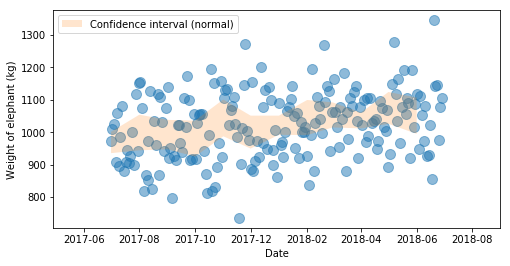

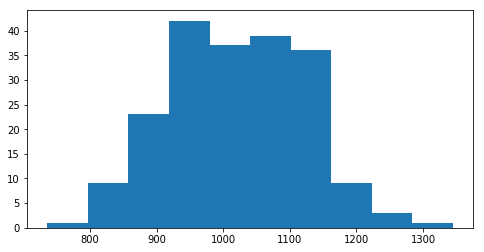

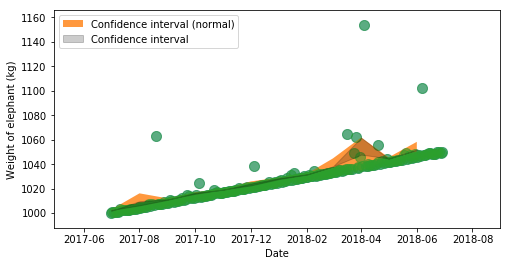

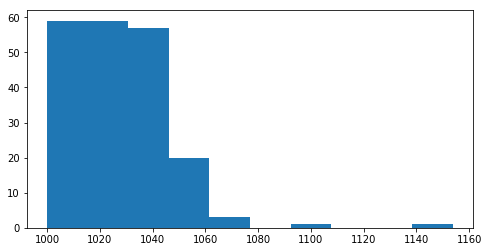

In [36]:
np.random.seed(41)

def add_gaussian_noise(mean=0, std=100, dist='normal'):
    """
    :param mean: mean
    :param std: standard deviation
    :return: simulated random gaussian noise
    """
    if dist == 'normal':
        return stats.norm.rvs(mean, std)
    else:
        skew_param = 100
        return stats.lognorm.rvs(2.627, 0, 0.1)

def generate_time_series(k=50, m=1000, n=200, start_date=datetime.date(2017, 7, 1), dist='skew'):
    """
    :param k: slope, increment in upwards/downwards trend (step size)
    :param m: y-intercept
    :param n: number of samples
    :param start_date: start point in time-series
    :return: 
    """
    xs = np.linspace(0, 1, n, endpoint=False)
    ys = [k * x + m + add_gaussian_noise(dist=dist) for x in xs]
    ts = [start_date + datetime.timedelta(x) * 365 for x in xs]
    return ys, ts

ys, ts = generate_time_series(dist='normal')

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(ts, ys, alpha=0.5, s=100)
ax.set_xlabel('Date')
ax.set_ylabel('Weight of elephant (kg)');

def calc_confidence_interval(observations_by_group):
    groups = list(sorted(observations_by_group.keys()))
    lo_bound = []
    hi_bound = []
    for group in groups:
        series = observations_by_group[group]
        mu, std, n = np.mean(series), np.std(series), len(series)
        lo_bound.append(mu - 1.96*std*n**-0.5)
        hi_bound.append(mu + 1.96*std*n**-0.5)
    return lo_bound, hi_bound, groups

d = pd.DataFrame({'t': ts, 'Weight (kg)': ys})
d['Month'] = d['t'].apply(lambda t: t.strftime('%Y-%m'))

observations_by_month = {}
for month, y in zip(d['Month'], d['Weight (kg)']):
    observations_by_month.setdefault(month, []).append(y)
lo_bound, hi_bound, groups = calc_confidence_interval(observations_by_month)
ax.fill_between(groups, lo_bound, hi_bound, alpha=0.2, label='Confidence interval (normal)')
ax.legend()

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(ys)

ys, ts = generate_time_series(dist='skew')

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(ts, ys, alpha=0.5, s=100)
ax.set_xlabel('Date')
ax.set_ylabel('Weight of elephant (kg)');

def calc_confidence_interval(observations_by_group):
    groups = list(sorted(observations_by_group.keys()))
    lo_bound = []
    hi_bound = []
    for group in groups:
        series = observations_by_group[group]
        mu, std, n = np.mean(series), np.std(series), len(series)
        lo_bound.append(mu - 1.96*std*n**-0.5)
        hi_bound.append(mu + 1.96*std*n**-0.5)
    return lo_bound, hi_bound, groups

d = pd.DataFrame({'t': ts, 'Weight (kg)': ys})
d['Month'] = d['t'].apply(lambda t: t.strftime('%Y-%m'))

observations_by_month = {}
for month, y in zip(d['Month'], d['Weight (kg)']):
    observations_by_month.setdefault(month, []).append(y)
lo_bound, hi_bound, groups = calc_confidence_interval(observations_by_month)
ax.fill_between(groups, lo_bound, hi_bound, alpha=0.8, label='Confidence interval (normal)')
ax.legend()

lo_bounds = []
hi_bounds = []
months = sorted(observations_by_month.keys())
for month in months:
    series = observations_by_month[month]
    bootstrapped_means = []
    for i in range(10000):
        # sample with replacement
        bootstrap = [random.choice(series) for _ in series]
        bootstrapped_means.append(np.mean(bootstrap))
    lo_bounds.append(np.percentile(bootstrapped_means, 2.5))
    hi_bounds.append(np.percentile(bootstrapped_means, 97.5))
ax.scatter(ts, ys, alpha=0.5, s=100)
ax.fill_between(months, lo_bounds, hi_bounds, alpha=0.2,
                    label='Confidence interval', color='k')
ax.legend()

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(ys)

In [2]:
import requests
import io
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime
from scipy import stats
from sklearn.utils import resample


def process_time(row):

    call_received = datetime.datetime.strptime(row['date_time_received'].split('+')[0], '%Y-%m-%dT%H:%M:%S')
    call_ended    = datetime.datetime.strptime(row['date_time_complete'].split('+')[0], '%Y-%m-%dT%H:%M:%S')
    time_ellapsed = call_ended - call_received
    
    row['Call Received'] = str(call_received)
    row['Call Ended'] = str(call_ended)
    row['Time Ellapsed'] = str(time_ellapsed)
    row['Time Ellapsed (minutes)'] = round(time_ellapsed.total_seconds() / 60, 1)
    return row

def process_data():
    
    base_url = 'https://aegis4048.github.io/downloads/notebooks/sample_data/'
    filename = '08c32c03-9d88-42a9-b8a1-f493a644b919_NRCEventReporting-Calls-2010.csv'
    data = requests.get(base_url + filename).content
    
    df = pd.read_csv(io.StringIO(data.decode('utf-8')))
    df = df.iloc[6000: 8000, :].apply(process_time, axis=1).iloc[:, -4:]
    df['Call Received'] = pd.to_datetime(df['Call Received'], format='%Y-%m-%d %H:%M:%S')
    df['Call Ended'] = pd.to_datetime(df['Call Ended'], format='%Y-%m-%d %H:%M:%S')
    df['Days'] = df['Call Received'].apply(lambda x: str(x)[: 10])
    df = df.sort_values(by = 'Call Received')
    df = df.drop_duplicates(subset=['Call Received'], keep=False)
    return df

df = process_data()
duration = df['Time Ellapsed (minutes)'].values
time = df['Call Received'].values

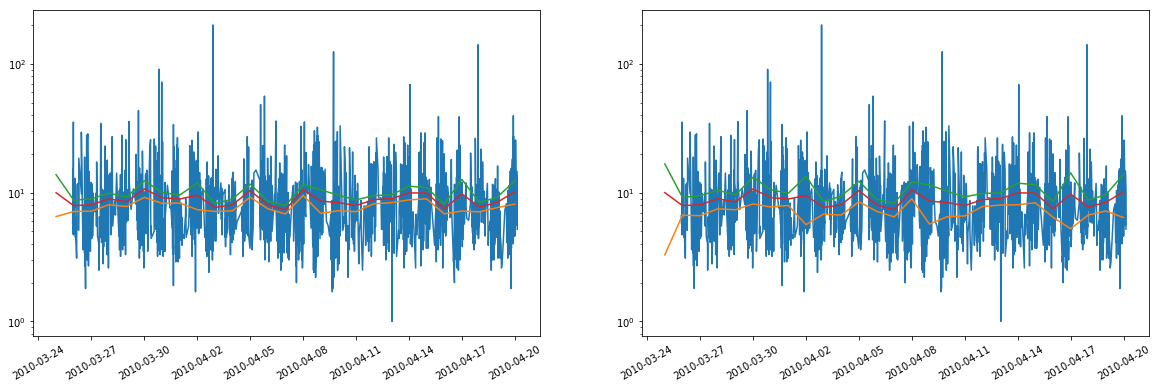

In [12]:
np.random.seed(42)

def conf_int_mean(arr, mode='t-interval', alpha=0.05):
    if mode == 't-interval':
        lo, hi = stats.t.interval(1 - alpha, len(arr) - 1, loc=np.mean(arr), scale=stats.sem(arr))
        return lo, hi, np.mean(arr)
    elif mode == 'bootstrap':
        boot = np.array([resample(arr, replace=True, n_samples=len(arr)) for _ in range(10000)])
        boot_means = np.mean(boot, axis=1)
        lo = np.percentile(boot_means, 10)
        hi = (np.percentile(boot_means, 90)) 
        return lo, hi, np.mean(boot_means)
    else:
        raise e

days = set(list(df['Days']))
bins_by_days = {}
for day, y in zip(df['Days'], df['Time Ellapsed (minutes)']):
    bins_by_days.setdefault(day, []).append(y)

xt, y10, y50, y90 = [], [], [], []
for day in sorted(bins_by_days.keys()):
    lo, mean, hi = conf_int_mean(bins_by_days[day], 'bootstrap')
    xt.append([datetime.datetime.strptime(day, '%Y-%m-%d')])
    y10.append(lo)
    y50.append(mean)
    y90.append(hi)
    
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].plot(time, duration)
ax[0].tick_params(axis='x', rotation=30)
ax[0].plot(xt, y10)
ax[0].plot(xt, y50)
ax[0].plot(xt, y90)
ax[0].set_yscale('log')

xt, y10, y50, y90 = [], [], [], []
for day in sorted(bins_by_days.keys()):
    lo, mean, hi = conf_int_mean(bins_by_days[day], 't-interval')
    xt.append([datetime.datetime.strptime(day, '%Y-%m-%d')])
    y10.append(lo)
    y50.append(mean)
    y90.append(hi)
    
ax[1].plot(time, duration)
ax[1].tick_params(axis='x', rotation=30)
ax[1].plot(xt, y10)
ax[1].plot(xt, y50)
ax[1].plot(xt, y90)
ax[1].set_yscale('log')

In [44]:
np.array(bootstrapped_means).shape

(1000,)

In [46]:
boot_mean.shape

(1000,)

In [51]:
np.percentile(sorted(bootstrapped_means), 2.5)

7.433125

In [56]:
np.percentile(sorted(boot_mean), 2.5)

7.391666666666667

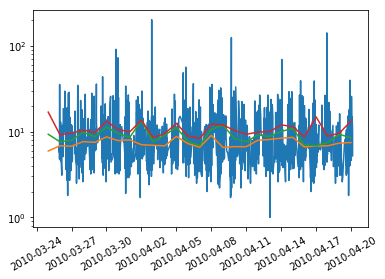

In [42]:
days = set(list(df['Days']))
bins_by_days = {}
for day, y in zip(df['Days'], df['Time Ellapsed (minutes)']):
    bins_by_days.setdefault(day, []).append(y)

xt, y10, y50, y90 = [], [], [], []

lo_bounds = []
hi_bounds = []
for day in sorted(bins_by_days.keys()):
    series = bins_by_days[day]
    bootstrapped_means = []
    for i in range(1000):
        # sample with replacement
        bootstrap = [random.choice(series) for _ in series]
        bootstrapped_means.append(np.mean(bootstrap))
    lo_bounds.append(np.percentile(bootstrapped_means, 2.5))
    hi_bounds.append(np.percentile(bootstrapped_means, 97.5))    
    
    lo, mean, hi = conf_int_mean(series, mode='bootstrap')
    xt.append([datetime.datetime.strptime(day, '%Y-%m-%d')])
    y10.append(lo)
    y50.append(mean)
    y90.append(hi)
    
fig, ax = plt.subplots()
ax.plot(time, duration)
ax.tick_params(axis='x', rotation=30)
ax.plot(xt, lo_bounds)
ax.plot(xt, y50)
ax.plot(xt, hi_bounds)
ax.set_yscale('log')

        boot = np.array([resample(series, replace=True, n_samples=len(series)) for _ in range(1000)])
        # 1000 x 1 array
        boot_mean = np.mean(boot, axis=1)
        lo = boot_mean[50]
        hi = boot_mean[950]
        
        bootstrap = [random.choice(series) for _ in series]
        bootstrapped_means.append(np.mean(bootstrap))

In [29]:
from sklearn.utils import resample

# 1000 x 12 array
boot = np.array([resample(bins_by_days[day], replace=True, n_samples=len(bins_by_days[day])) for _ in range(1000)])

# 1000 x 1 array
boot_mean = np.mean(boot, axis=1)

In [222]:
def lognorm_params(mode, stddev):
    """
    Given the mode and std. dev. of the log-normal distribution, this function
    returns the shape and scale parameters for scipy's parameterization of the
    distribution.
    """
    p = np.poly1d([1, -1, 0, 0, -(stddev/mode)**2])
    r = p.roots
    sol = r[(r.imag == 0) & (r.real > 0)].real
    shape = np.sqrt(np.log(sol))
    scale = mode * sol
    return shape, scale

In [223]:
sigma, scale = lognorm_params(0.0001, 100)

In [225]:
sigma, scale

(array([2.62830846]), array([0.10002501]))

In [227]:
stats.lognorm.rvs(2.627, 0, 0.1)

1.1761971327350966

Text(0,0.5,'Weight of elephant (kg)')

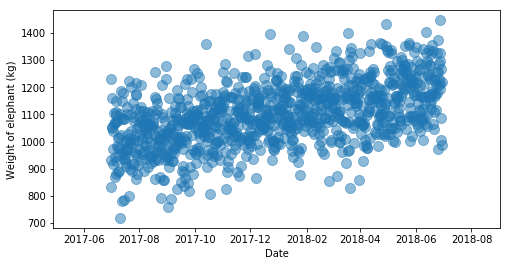

In [103]:
def add_gaussian_noise(mean=0, std=100):
    """
    :param mean: mean
    :param std: standard deviation
    :return: simulated random gaussian noise
    """
    return random.gauss(mean, std)

def generate_time_series(k=200, m=1000, n=1000, start_date=datetime.date(2017, 7, 1)):
    """
    :param k: slope, increment in upwards/downwards trend (step size)
    :param m: y-intercept
    :param n: number of samples
    :param start_date: start point in time-series
    :return: 
    """
    xs = np.linspace(0, 1, n, endpoint=False)
    ys = [k * x + m + add_gaussian_noise() for x in xs]
    ts = [start_date + datetime.timedelta(x) * 365 for x in xs]
    return ys, ts

ys, ts = generate_time_series()

fig, ax = plt.subplots(figsize=(8, 4))
plt.scatter(ts, ys, alpha=0.5, s=100)
plt.xlabel('Date')
plt.ylabel('Weight of elephant (kg)')

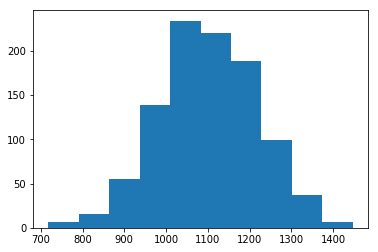

In [104]:
plt.hist(ys);

In [91]:
from scipy import stats

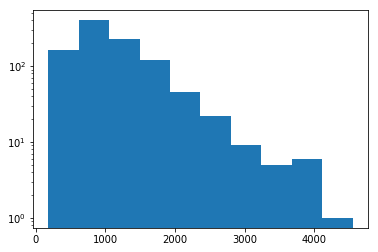

In [92]:
temp = sorted(stats.lognorm.rvs(s=0.5, loc=1, scale=1000, size=1000))
plt.hist(temp)
plt.yscale('log')

In [25]:
def generate_time_series(k=200, m=1000, sigma=100, n=50, start_date=datetime.date(2017, 7, 1)):
    xs = numpy.linspace(0, 1, n, endpoint=False)
    ys = [k * x + m + random.gauss(0, sigma) for x in xs]
    ts = [start_date + datetime.timedelta(x) * 365 for x in xs]
    x_scale = numpy.linspace(-1, 2, 500) # for plotting
    t_scale = [start_date + datetime.timedelta(x)*365 for x in x_scale]
    return xs, ys, ts, x_scale, t_scale

xs, ys, ts, x_scale, t_scale = generate_time_series()

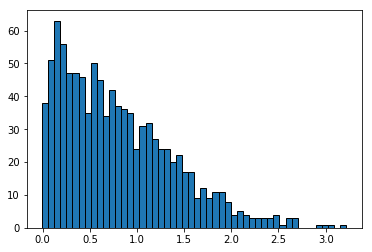

In [113]:
data = stats.skewnorm.rvs(100, size=1000)
fig, ax = plt.subplots()
ax.hist(data, bins=50, edgecolor='black');

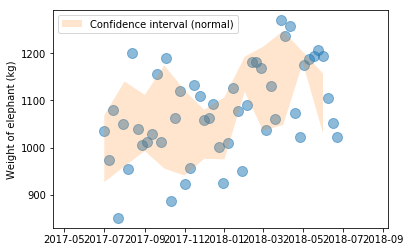

In [21]:
def plot_confidence_interval(observations_by_group):
    groups = list(sorted(observations_by_group.keys()))
    lo_bound = []
    hi_bound = []
    means = []
    for group in groups:
        series = observations_by_group[group]
        mu, std, n = numpy.mean(series), numpy.std(series), len(series)
        lo_bound.append(mu - 1.96*std*n**-0.5)
        hi_bound.append(mu + 1.96*std*n**-0.5)
        means.append(mu)
    plt.fill_between(groups, lo_bound, hi_bound, alpha=0.2, label='Confidence interval (normal)')
    return means, groups
    
def generate_time_series(k=200, m=1000, sigma=100, n=50, start_date=datetime.date(2017, 7, 1)):
    xs = numpy.linspace(0, 1, n, endpoint=False)
    ys = [k*x + m + random.gauss(0, sigma) for x in xs]
    ts = [start_date + datetime.timedelta(x)*365 for x in xs]
    x_scale = numpy.linspace(-1, 2, 500) # for plotting
    t_scale = [start_date + datetime.timedelta(x)*365 for x in x_scale]
    return xs, ys, ts, x_scale, t_scale

xs, ys, ts, x_scale, t_scale = generate_time_series()
d = pandas.DataFrame({'x': xs, 't': ts, 'Weight (kg)': ys})
d['Month'] = d['t'].apply(lambda t: t.strftime('%Y-%m'))

plt.scatter(ts, ys, alpha=0.5, s=100)
observations_by_month = {}
for month, y in zip(d['Month'], d['Weight (kg)']):
    observations_by_month.setdefault(month, []).append(y)
means, groups = plot_confidence_interval(observations_by_month)
plt.ylabel('Weight of elephant (kg)')
plt.legend()


In [116]:
right_tail = stats.chi2.ppf(1 - 0.025, df) 
left_tail = stats.chi2.ppf(1 - 0.975, df) 

In [117]:
right_tail

19.02276779864163

In [115]:
left_tail_975 = stats.chi2.ppf(1 - 0.975, df) 


**Variance follows chi-squared distribution, if samples are normally distributed.**

**P-value propagates toward left**

**Equation, depends on alpha, degree of freedom**


Means can be the same, but their std can be different. One team is pretty consistent from game to game, but the other team fluctuates a lot. Which team has the smaller score variance? -> plays a very important role in quality assurance and operations management

Variance is chi-square distributed. But how is it related to the actual data we collect?

$$\chi^2 = \frac{(n-1)s^2}{\sigma^2}$$

$$\chi_{.975}^{2} < \chi^2 < \chi_{.025}^{2}$$

$$ \text{C.I.}_{\text{variance}}: \frac{(n-1)s^{2}}{\chi^{2}_{\frac{\alpha}{2}}} \leq \sigma^2 \leq \frac{(n-1)s^{2}}{\chi^{2}_{1-\frac{\alpha}{2}}}$$

<code>stats.chi2.ppf(0.975, 11) = 21.92</code>

We are estimating population variance. 

This volatility is one way of interpreting risk. The trade-off of risk vs. reward.

Used in conjunction with more advanced tasks.

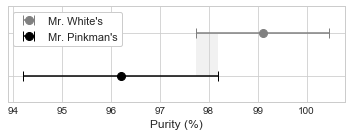

In [2]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

conf_pinkman = stats.t.interval(1 - 0.05, 18 - 1, loc=96.2, scale= 4 / np.sqrt(18))
conf_white = stats.t.interval(1 - 0.05, 21 - 1, loc=99.1, scale= 3 / np.sqrt(21))

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(5, 2))

ax.errorbar(99.1, 1, xerr=(conf_white[1] - conf_white[0]) / 2,
            fmt='o', markersize=8, capsize=5, label='Mr. White\'s', color='grey')
ax.errorbar(96.2, 0, xerr=(conf_pinkman[1] - conf_pinkman[0]) / 2,
            fmt='o', markersize=8, capsize=5, label='Mr. Pinkman\'s', color='k')
ax.set_ylim(-0.6, 1.6)
ax.fill_betweenx([1, 0], conf_white[0], conf_pinkman[1], facecolor='lightgrey', alpha=0.3)
ax.legend(loc='best', fontsize=11, framealpha=1, frameon=True)
ax.set_xlabel('Purity (%)', fontsize=12)
ax.yaxis.set_major_formatter(plt.NullFormatter())
fig.tight_layout();

## Robustness of variance to non-normality

Standard deviations are a bit more sensitive to outliers than means are -- when you put in an outlier, you tend to push the one-sample t-statistic toward 1 or -1.

https://stats.stackexchange.com/questions/193117/why-is-high-positive-kurtosis-problematic-for-hypothesis-tests

### Difference of the confidence interval constructed with t-test vs bootstrap for skewed data

<div id="central_tendency"></div>

### Measuring central tendency of distributions

We discussed how to compute <a href="#conf_int_of_mean">confidence interval of mean</a> and <a href="#conf_int_of_diff_in_mean">confidence interval of difference in means.</a> But have you thought about why statisticians bother specifically about the means? Often times the ultimate goal is not to compute a <i>mean</i> of a distribution, but to compute a <i>measure of central tendency</i> of a distribution. 

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. The mean is the measure of central tendency that you are the most familiar with, but there are others, such as the median and the mode. 

<div><hr></div>

**Point estimation**

Mean is not a good measure of central tendency when there is a sign of deviation from normality, which can be characterized by skewness (asymmetry) and kurtosis (heavy-tails). Consider the following figures:

<div id="" class="row give-margin-inline-big-plot mobile_responsive_plot_full_width" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_int_non_norm_means.png"></div>
    <div class="col-12"><p class="image-description">Figure ??: Central tendency of distributions</p></div>
</div>

In <a href="#">figure (??) (a)</a>, there is no skewness, making the distribution symmetric. In this case, mean is a good measure of central tendency, along with median and mode — they are all equivalent. You can compute its confidence interval of mean using <a href="#eq-1">eq (1)</a>, and use it as a measure of central tendency, thanks to the symmetry of the distribution.

However, when distributions have non-zero skewness, as in <a href="#">figure (??) (b)</a>, the assumption of normality is violated. Depending on how bad the asymmetry is, you can still use <a href="#eq-1">eq (1)</a>, because confidence interval of mean is robust to mild asymmetry. However, if a distribution has non-negligible skewness, interval computed with <a href="#eq-1">eq (1)</a> introduces bias to one side of a distribution. 

Although there exists non-parametric alternatives like Bootstrap and credible interval, you may want to take a step back and reconsider the purpose of your estimation. Are you really interested in the <i>mean</i>, or the <i>central tendency</i> of your distribution? In a case like <a href="#">figure (??) (b)</a>, perhaps you are more interested in the median, as it's a better measure of central tendency of asymmetric distributions. 

Visualize your distribution to see what your true interest is.

<div><hr></div>

**Comparison of distributions**

Similar idea applies when you want to compare two distributions. Let's say that you want to decide if two samples came from the same population by comparing their confidence interval of means. Consider the following figure of two non-normal sample distributions:

<div id="" class="row full_screen_margin_md mobile_responsive_plot_full_width" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_int_non_norms_overlap.png"></div>
    <div class="col-12"><p class="image-description">Figure ??: Confidencen interval of means for non-normal distributions</p></div>
</div>

Note that the <span style="color: #385624; font-weight: 500;">95% confidence interval of means</span> in <a href="#">figure (??)</a> are asymmetric about their respective sample means, because they are computed with non-parametric alternatives. Since there is an overlap of the two intervals, you can conclude that the sample means are not significantly different. Furthermore, even the variances of the samples are the same; I generated the plots so that they have the same variances. 

Now, you know that the samples have equal means and variances within the range of uncertainty. Can you conclude that the two samples came from the same population? Clearly not, because their central locations are far apart from each other. Their central tendencies are better described by their medians than their means.

In this case, if you are using confidence confidence interval of means and variances to check if two samples came from the same population, your approach is wrong. This kind of approach assumes normality of data. Any approach that makes a certain assumption of data fails when that assumption is violated. 

If your goal is to find out if the two samples originated from the same population, you may want to use non-parametric alternatives, such as Mann-Whitney test or Kruskall-Wallis test; they are geared towards comparing central tendency of distributions, not means or variances.

### Robustness of t-test

T-test loses some of its statistical power when there is a sign of deviation from normality, which can be characterized by skewness (asymmetry) and kurtosis (heavy-tails). Why? It's because t-test is a test of means, and means are not good measures of central tendency of asymmetric distributions, as I explained <a href="#">here</a>. 

Let's say that you want to decide if two samples came from different populations by comparing the confidence interval of means. Consider the following figure: 

-------- image --------



T-test is fairly resistant to moderate deviations from normality — visualize your distribution to test this. 






To be specific, it is sensitive to asymmetry of the distribution, but not much to kurtosis. As a rule of thumb (not a law of nature), inference about means is sensitive to skewness and inference about variances is sensitive to kurtosis



asymptotic expansion

https://stats.stackexchange.com/questions/2492/is-normality-testing-essentially-useless/30053#30053



T-test is fairly resistent to moderate deviations 

https://www.johndcook.com/blog/2018/05/11/two-sample-t-test/

That said, the t-test can tolerate moderate skewness and heavy-tailedness (though in the latter case your actual significance levels will tend to be lower than the nominal 𝛼).

Non-parametric alternatives are 95% powerful of t-test, when data are normal.

# Bootstrapping

convergence in the Monte Carlo integration.

**Clarifiy Bootstrap resamples (r) vs original samples (n)**

https://yanirseroussi.com/2019/01/08/hackers-beware-bootstrap-sampling-may-be-harmful/

Unfortunately, this method is just not accurate enough for small sample sizes. Quoting Hesterberg (emphasis mine):

"The sample sizes needed for different intervals to satisfy the “reasonably accurate” (off by no more than 10% on each side) criterion are: n ≥ 101 for the bootstrap t, 220 for the skewness-adjusted t statistic, 2,235 for expanded percentile, 2,383 for percentile, 4,815 for ordinary t (which I have rounded up to 5,000 above), 5,063 for t with bootstrap standard errors and something over 8,000 for the reverse percentile method."

In practice, implementing some of the more accurate bootstrap methods is difficult (especially those not described here), and people should use a package rather than attempt this themselves.

In short, make sure you’re using an accurate method for estimating confidence intervals when dealing with sample sizes of less than a few thousand values

Accurate bootstrap estimates require a large number of resamples. Many code snippets use 1,000 resamples, probably because it looks like a large number. However, seeming large isn’t enough. Quoting Hesterberg again:

For both the bootstrap and permutation tests, the number of resamples needs to be 15,000 or more, for 95% probability that simulation-based one-sided levels fall within 10% of the true values, for 95% intervals and 5% tests. I recommend r = 10,000 for routine use, and more when accuracy matters.

We want decisions to depend on the data, not random variation in the Monte Carlo implementation. We used r = 500,000 in the Verizon project.

That’s right, half a million resamples! Accuracy mattered in the Verizon case, as the results of the analysis determined whether large penalties were paid or not. In short, use at least 10-15,000 resamples to be safe. Don’t use 1,000.

https://stats.stackexchange.com/questions/246726/size-of-bootstrap-samples

The bootstrap method is only useful if your sample follows more or less (read exactly) the same distribution as the original population. In order to be certain this is the case you need to make your sample size large enough. But what is large enough?

I took interest in this question because I saw the word bootstrap and I have written books on the bootstrap. Also people often ask "How many bootstrap samples do I need to get a good Monte Carlo approximation to the bootstrap result?" My suggested answer to that question is to keep increasing the size until you get convergence. No one number fits all problems.

Now if the sample size is very small---say 4---the bootstrap may not work just because the set of possible bootstrap samples is not rich enough. In my book or Peter Hall's book this issue of too small a sample size is discussed. But this number of distinct bootstrap samples gets large very quickly. So this is not an issue even for sample sizes as small as 8.

While the basic bootstrap makes no assumption about the underlying distribution of the data, it is not assumption-free. For example, when dealing with correlated data points from a time series, using the basic bootstrapping approach is wrong because it assumes that the data points are independent. Instead, a block bootstrap should be used – see the ARCH package for some implementation examples. In addition, bootstrapping doesn’t solve problems with the underlying sampling approach. For example, the data sample may not be representative of the population because of its small size, or there may be selection biases and measurement errors.

https://erikbern.com/2018/10/08/the-hackers-guide-to-uncertainty-estimates.html

Another approach that can be useful is bootstrapping. It allows you do compute the same statistics without memorizing any formulas. Bootstrapping is nice because it lets you dodge any questions about what probability distribution the data is generated from. It’s basically plug and play, and works on almost everything, though it can be a bit slow. Be aware though that there’s a danger zone of bootstrapping. My understanding is that bootstrapping will converge towards the correct estimates as the number of samples goes to infinity, but if you’re working with small samples, you can get really wonky results. I generally never trust bootstrapping for anything less than say 50 samples, and you probably shouldn’t do that either.

**Time-Series Bootstrapping**

https://stats.stackexchange.com/questions/25706/how-do-you-do-bootstrapping-with-time-series-data

The resampling method introduced in Efron (1979) was designed for i.i.d. univariate data but is easily extended to multivariate data. As discussed in . If x1,⋅⋅⋅,xn is a sample of vectors, to maintain the covariance structure of the data in the sample. It is not immediately obvious whether one can resample a time series x1,x2,⋅⋅⋅,xn. A time series is essentially a sample of size 1 from a stochastic process. Resampling a sample is original sample, so one learns nothing by resampling. Therefore, resampling of a time series requires new ideas.

Model-based resampling is easily adopted to time series. The resamples are obtained by simulating the time series model. For example, if the model is ARIMA(p,d,q), then the resamples of an ARIMA(p, q) model with MLEs (from the differenced series) of the autoregressive and moving average coefficients and the noise variance. The resamples are the sequences of partial sum of the simulated ARIMA(p, q) process.

Model-free resampling of time series is accomplished by block resampling, also called block bootstrap

The idea is to break the series into roughly equal-length blocks of consecutive observations, to resample the block with replacement, and then to paste the blocks together. 

Bootstrapping requires data to be 

### Robustness of confidence interval of variance

## Non-parametric alternatives

In [6]:
from scipy import stats
%matplotlib inline

stats.chi2.ppf(0.025, 11)

3.8157482522361

In [177]:
x1 = [12.9, 10.2, 7.4, 7.0, 10.5, 11.9, 7.1, 9.9, 14.4, 11.3]
x2 = [10.2, 6.9, 10.9, 11.0, 10.1, 5.3, 7.5, 10.3, 9.2, 8.8]

alpha = 0.05                                                       # significance level = 5%
n1, n2 = len(x1), len(x2)                                          # sample sizes
s1, s2 = np.var(x1, ddof=1), np.var(x2, ddof=1)                    # sample variances
df = (s1/n1 + s2/n2)**2 / ((s1/n1)**2/(n1-1) + (s2/n2)**2/(n2-1))  # degrees of freedom
t = stats.t.ppf(1 - alpha, df)   

lower = (np.mean(x1) - np.mean(x2)) - t * np.sqrt(1 / len(x1) + 1 / len(x2)) * s

lower

-0.49379818720606283

In [3]:
from scipy.stats import skewnorm
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats
a=100
data= skewnorm.rvs(a, size=1000)

0.8381086010164204
0.7177974832846665


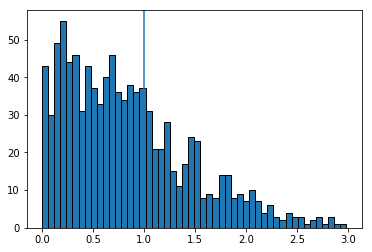

In [91]:
print(np.mean(data))
print(np.median(data))

fig, ax = plt.subplots()
_ = ax.hist(data, bins=50, edgecolor='black');

ax.axvline(1)

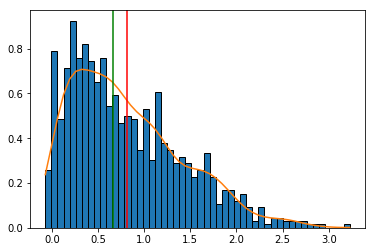

In [321]:
%matplotlib inline

data = stats.skewnorm.rvs(20, size=1000)
density = stats.gaussian_kde(noise)
mean = np.mean(data)
median = np.median(data)

fig, ax = plt.subplots()
n, x, _ = ax.hist(data, bins=50, density=True, edgecolor='black')  
ax.plot(x, density(x))
ax.axvline(mean, color='red')
ax.axvline(median, color='green')

In [322]:
lower, upper = stats.t.interval(1 - 0.05, len(data) - 1, loc=np.mean(data), scale=stats.sem(data))
mean = np.mean(data)

print((lower, upper))
print(mean)

(0.7714451906907809, 0.8480109036057044)
0.8097280471482426


In [323]:
incre = 5
temp, lmbda = stats.boxcox(data + incre)

lower_b, upper_b = stats.t.interval(1 - 0.05, len(temp) - 1, loc=np.mean(temp), scale=stats.sem(temp))

lower_b, upper_b = inv_boxcox(lower_b, lmbda), inv_boxcox(upper_b, lmbda)
mean_b = inv_boxcox(mean, lmbda)

In [324]:
print((lower_b - incre, upper_b - incre))

(0.6609200748348814, 0.7272585524637014)


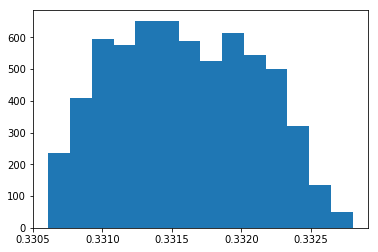

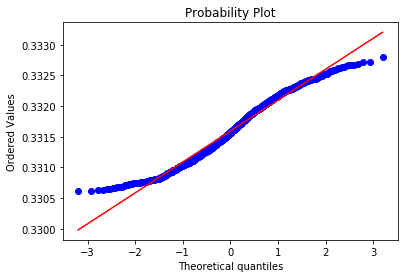

In [330]:
plt.hist(temp, density=True, bins='auto');
fig, ax = plt.subplots()
prob = stats.probplot(temp, dist=stats.norm, plot=ax)

In [290]:
from scipy.special import inv_boxcox

In [292]:
from sklearn.utils import resample

boots = np.array([resample(data, replace=True) for _ in range(100)])
a = sorted(np.mean(boots, axis=1))
print(a[5], a[95])
print(a[50])

0.7418236409304393 0.796416903031344
0.7675645387929715


In [331]:
# sample data generation
np.random.seed(42)
data = sorted(stats.lognorm.rvs(s=0.5, loc=1, scale=1000, size=1000))

# fit lognormal distribution
shape, loc, scale = stats.lognorm.fit(data, loc=0)
pdf_lognorm = stats.lognorm.pdf(data, shape, loc, scale)

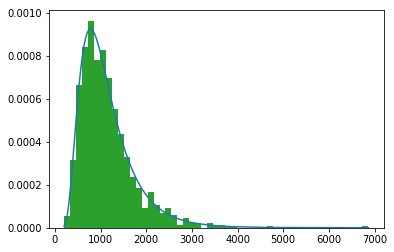

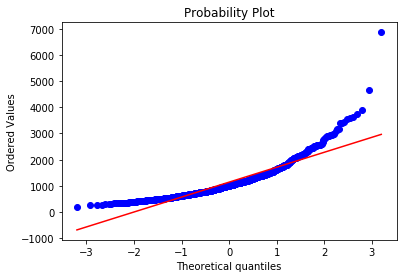

In [333]:
plt.plot(data, pdf_lognorm)
plt.hist(data, density=True, bins='auto');

plt.hist(data, density=True, bins='auto');
fig, ax = plt.subplots()
prob = stats.probplot(data, dist=stats.norm, plot=ax)

In [334]:
from sklearn.utils import resample

boots = np.array([resample(data, replace=True) for _ in range(100)])
a = sorted(np.mean(boots, axis=1))
print(a[5], a[95])
print(a[50])

1117.553360410937 1168.6710419552019
1142.8236697715936


In [335]:
lower, upper = stats.t.interval(1 - 0.05, len(data) - 1, loc=np.mean(data), scale=stats.sem(data))
mean = np.mean(data)

print((lower, upper))
print(mean)

(1103.6610566132003, 1180.2601663391847)
1141.9606114761925


## Measure of central tendency

The median is usually preferred to other measures of central tendency when your data set is skewed (i.e., forms a skewed distribution) or you are dealing with ordinal data.

It is usually inappropriate to use the mean in such situations where your data is skewed. You would normally choose the median or mode, with the median usually preferred.

## Robustness of confidence interval to non-normality

All of the discussions above assume normality of data set. Conclusions drawn from confidence intervals and hypothesis testing may be inaccurate, or completely wrong if the underlying assumptions are not met. This sections discusses why the assumption of normality is important, robustness of statistical estimations in regards to deviation from normality, and non-parametric alternatives.

### Measuring central tendency of distributions

We discussed how to compute <a href="#conf_int_of_mean">confidence interval of mean</a> and <a href="#conf_int_of_diff_in_mean">confidence interval of difference in means.</a> But have you thought about why statisticians bother specifically about the means? The ultimate goal is not to compute a <i>mean</i> of distributions, but to compute a <i>measure of central tendency</i> of distributions. 

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. The mean is the measure of central tendency that you are the most familiar with, but there are others, such as the median and the mode.


### Robustness of confidence interval of mean
### Robustness of confidence interval of variance

## Non-parametric alternatives

1. Is it for point estimation?
    - 
2. Is it for hypothesis testing?
3. 

The t tends to have reasonably good power relative to the Mann-Whitney for light-tailed distributions ... and can have really bad power for heavy-tailed ones. Skewness tends to be compounded with heavy tails

T-test is robust to mild skewness, that is, mild non-normality. 

 have to note that all of the knowledge I just imparted is somewhat obsolete; now that we have computers, we can do better than t-tests. As Frank notes, you probably want to use Wilcoxon tests anywhere you were taught to run a t-test.


<div id=""></div>
<div class="alert alert-info">
    <h4>Notes: Robustness of confidence interval to non-normality</h4>
    <p>t-test is fairly resistent to moderate deviations from normality
        
        If distribution is unacceptably not normal, use confidence interval of median, but only if your goal is to compare central tendency. 

Overall, the two sample t-test is reasonably power-robust to symmetric non-normality

When the two samples are mildly skew in the same direction, the one-tailed t-test is no longer unbiased.

Confidence interval of mean can stand some violation of normality. But confidecne interval of variance is very susceptible. 

</p>
    <p></p>
</div>

# Sample Sizes

Illustrate confidence intervals of every stats, with previously given s, mu. 

This comparison helps to determine how likely the difference between the means occurred by chance or whether the data sets really have intrinsic differences. The t-test questions whether the difference between the groups represents a true difference in the study or if it is likely a meaningless statistical difference.

### Python confidence interval of difference in means

https://stackoverflow.com/questions/31768464/confidence-interval-for-t-test-difference-between-means-in-python/34516534#34516534

# Power of non-parametric methods on normal data



# Bootstrapping

CLT does not apply to how many resampling you do. It applied only on the original dataset. 

In [29]:
np.var(y)

8.181868181125685e-05

In [30]:
np.var(y2)

8.181868181125686e-05

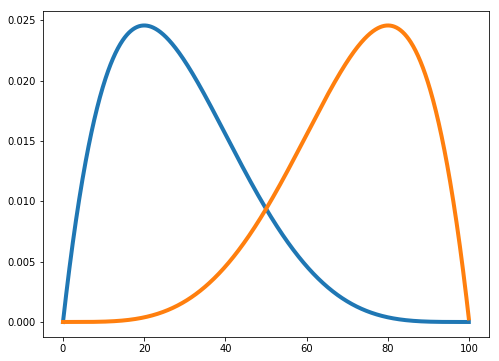

In [22]:


x = np.arange (0, 100, 0.1)
y = stats.beta.pdf(x, a=2, b=5, loc=0, scale=100)

x2 = np.arange (0, 100, 0.1)
y2 = stats.beta.pdf(x, a=5, b=2, loc=0, scale=100)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, x2, y2, linewidth=4)

# One-tail vs Two-tail

Customer: wants at least 355 ml in water
$$\text{Quantity of water} \geq 355 ml$$

Manufacturer: exactly 355 ml
$$\text{Quantity of water} = 355 ml$$

Collect 50 bottles, and test our assumption

# 1 sample vs 2 samples

Am I testing assumption, or the status quo that already exists? -> 1 sample?
Am I testing new claim or assertion beyoned what I already know? -> 2 samples?

# Frequently Asked Questions

1. What is significance level?
2. What is confidence level?
3. What is standard error?
4. What is distribution score?
5. What should I do if the sample data is not normally distributed?

### CI of lognormal distribution

https://amstat.tandfonline.com/doi/full/10.1080/10691898.2005.11910638#.XQvVFtNKhQI

In [25]:
x1 = [12.9, 10.2, 7.4, 7.0, 10.5, 11.9, 7.1, 9.9, 14.4, 11.3]
x2 = [10.2, 6.9, 10.9, 11.0, 10.1, 5.3, 7.5, 10.3, 9.2, 8.8]

In [26]:
stats.t.interval(1 - 0.05, len(x1) - 1, loc=np.mean(x1), scale=stats.sem(x1))

(8.461873578892417, 12.058126421107586)

In [27]:
stats.t.interval(1 - 0.05, len(x2) - 1, loc=np.mean(x2), scale=stats.sem(x2))

(7.663208497074507, 10.376791502925492)

In [28]:
stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=1.245268949149111, pvalue=0.23018336828903668)

A confidence interval's width is due entirely to sampling error. As the sample size approaches the entire population, the width of the confidence interval approaches zero.


<div><hr></div>

Confidence interval has the following general form:

<div id="eq-1" style="font-size: 1rem;">$$ \text{C. I.} = \text{point estimate} \pm (\text{distribution score} \times \text{Standard Error}) \tag{1} $$</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-3"><p>-$D^2$<p></div>
        <div class="col-9"><p> description description description description description description description description description<p></div>
    </div>
    <div class="row">
        <div class="col-3">-$D^2$</div>
        <div class="col-9">description</div>
    </div>    
</div>


The decision makers always wants to know the uncertainty related to your estimation. 

This tutorial includes explanation of idea behind C.I., complications that arise when sample data is not normally distributed and solutions for them. For those who don't want to spend more than 2 minutes reading, I included a quick Python code snippets that can generate C.I. for any type of distribution for any type of statistic.

**Central Limit Theorem may not always apply**

2. Nonnormal data, variance known: If the population distribution is not normal and the sample is 'large enough', then X¯ is approximately normal and the same formula provides an approximate 95% CI. The rule that n≥30 is 'large enough' is unreliable here. If the population distribution is heavy-tailed, then X¯ may not have a distribution that is close to normal (even if n≥30). The 'Central Limit Theorem', often provides reasonable approximations for moderate values of n, but it is a limit theorem, with guaranteed results only as n→∞.

Many statistical techniques assume that sample data is normally distributed or Gaussian-like (Ex: t-distribution), and different techniques should be considered for non-normal data set.

**Correct vs. Wrong vs. Useful**

In [4]:
print(np.mean(a))
print(np.std(a))

3.375
1.4086784586980805


### Extension of Confidence Interval with Bootstrapping

In [2]:
from scipy.stats import bayes_mvs

In [4]:
bayes_mvs([1,2,3,5,6,8,5,2])

(Mean(statistic=4.0, minmax=(2.39878883101482, 5.60121116898518)),
 Variance(statistic=8.0, minmax=(2.8435061229431486, 18.45571858443238)),
 Std_dev(statistic=2.691341356821504, minmax=(1.686269884372946, 4.296011939512317)))

<IPython.core.display.Javascript object>


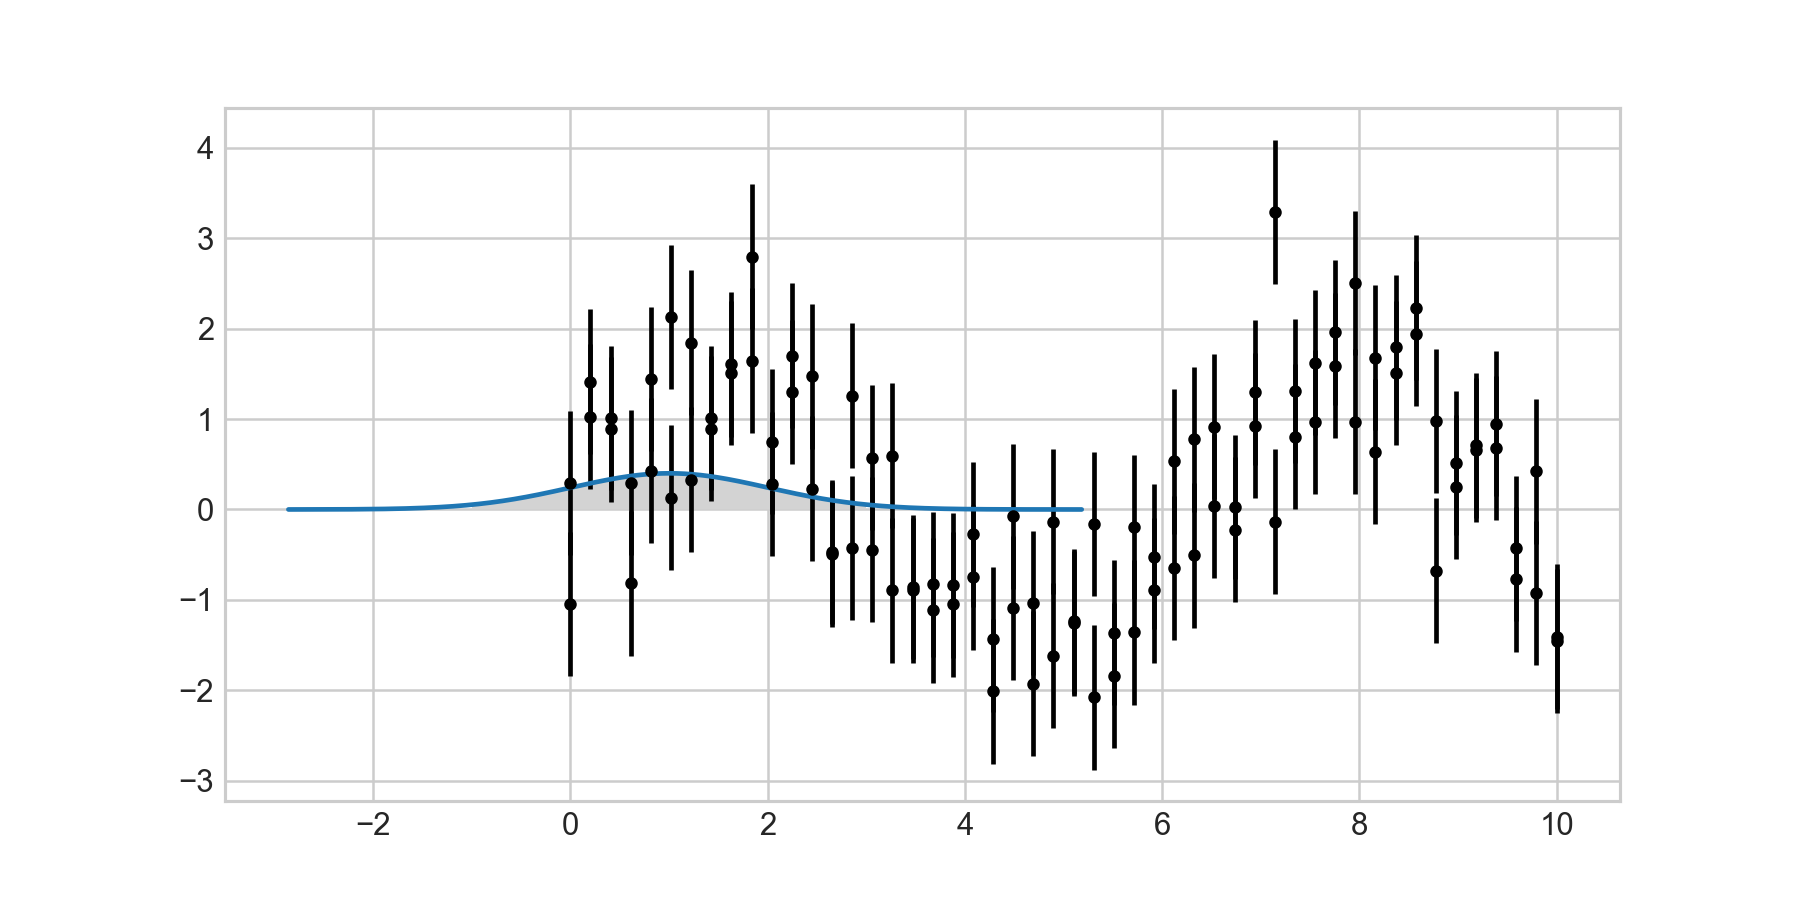

In [11]:
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
%matplotlib notebook

def get_truncated_normal(mean=1, sd=1, low=-3, upp=7):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)


X1 = sorted(get_truncated_normal().rvs(10000))
mean, std = stats.norm.fit(X1, loc=0)
pdf_norm = stats.norm.pdf(X1, mean, std)


fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(X1, pdf_norm)

ax.fill_between(X1, 0, pdf_norm, 
                where=(np.array(X1)>-1) & (np.array(X1)<=3), 
                facecolor='lightgrey')
# ax.fill_betweenx(pdf_norm, 2, x2=7, interpolate=True)

Note: This interval is only exact when the population distribution is normal. For large samples from other population distributions, the interval is approximately correct by the Central Limit Theorem.

### What is confidence level $1 - \alpha$?

Confidence level is the chance that the statistic value of your interest lies within the interval. A common choice of confidence level include 

# Simulation Ideas

https://stats.stackexchange.com/questions/38967/how-robust-is-the-independent-samples-t-test-when-the-distributions-of-the-sampl

## Practical Application - Bayes Approximation

# Kruskal-Wallis

Hence, in terms of original values, the Kruskal-Wallis is more general than a comparison of means: it tests whether the probability that a random observation from each group is equally likely to be above or below a random observation from another group. The real data quantity that underlies that comparison is neither the differences in means nor the difference in medians, (in the two sample case) it is actually the median of all pairwise differences - the between-sample Hodges-Lehmann difference.

# Non-Parametric Methods

Very robust under normality too.

Non-parametric tests (as Wilcoxon-Mann-Whitney) do not rely on a specific distiribution, but implicitly rely on equal variances: under H0 are all samples from the same population.

# Mann-Whitney

https://stats.stackexchange.com/questions/31361/some-questions-about-two-sample-comparisons

scipy.stats.mannwhitneyu: It returns a "One-sided p-value assuming a asymptotic normal distribution" . Why is it assuming a normal distribution? Should't this test work on any underlying distribution?

I think the sentence is referring to the large sample (asymptotic) distribution of the test statistic, not the data. As you can see here, the Mann-Whitney U test statistic has an approximate normal distribution when the sample size is large.

There's a difference between Mann-Whiteny, and Wilcoxon

Mann-Whitney U test works fine with continuous data, I would even say it works best with them because you would avoid ties.

When you have heavier-tailed than normal data, it's also typically more powerful than the t-test

The median is usually preferred to other measures of central tendency when your data set is skewed (i.e., forms a skewed distribution) or you are dealing with ordinal data.

In no way will the difference in sample sizes adversely affect the Mann-Whitney-Wilcoxon test.

Valid only when more than 20 samples

FYI, Wikipedia adds that, for large samples, 𝑈 is approximately normally distributed. Given all these values, one can also calculate the effect size η2,

https://stats.stackexchange.com/questions/67204/what-exactly-does-a-non-parametric-test-accomplish-what-do-you-do-with-the-res/67210#67210

This link says that Welch t-test should always be used over Mann-Whitney if your goal is to compare central tendency of two distributions: 

https://stats.stackexchange.com/questions/313471/always-use-welch-t-test-unequal-variances-t-test-instead-of-student-t-or-mann

# Hotelling's T stats

https://courses.lumenlearning.com/boundless-statistics/chapter/the-t-test/

# Normality testing

take a test on the distribution, e.g. Kolmogorov-Smirnov-test. After that you know whether you have a normal or not. then you need to test neither skewness nor curtosis.

The values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order to prove normal univariate distribution (George & Mallery, 2010)

# F-test

For non-normal data, the distribution of the sample variance may deviate substantially from a χ2 distribution. However, if the sample size is large, Slutsky's theorem implies that the distribution of the sample variance has little effect on the distribution of the test statistic.

# Hypothesis Testing

 For the unequal variance t test, the null hypothesis is that the two population means are the same but the two population variances may differ. If the P value is large, you don't reject that null hypothesis, so conclude that the evidence does not persuade you that the two population means are different, even though you assume the two populations have (or may have) different standard deviations. What a strange set of assumptions. What would it mean for two populations to have the same mean but different standard deviations? Why would you want to test for that? Swailowsky points out that this situation simply doesn't often come up in science (1). 

I think the unequal variance t test is more useful when you think about it as a way to create a confidence interval. Your prime goal is not to ask whether two populations differ, but to quantify how far apart the two means are. The unequal variance t test reports a confidence interval for the difference between two means that is usable even if the standard deviations differ.

**Single sample vs Two samples**

**Two-tailed vs one-tailed**

For example, we may wish to compare the mean of a sample to a given value x using a t-test.  Our null hypothesis is that the mean is equal to x. A two-tailed test will test both if the mean is significantly greater than x and if the mean significantly less than x. The mean is considered significantly different from x if the test statistic is in the top 2.5% or bottom 2.5% of its probability distribution, resulting in a p-value less than 0.05

 Our null hypothesis is that the mean is equal to x. A one-tailed test will test either if the mean is significantly greater than x or if the mean is significantly less than x, but not both. Then, depending on the chosen tail, the mean is significantly greater than or less than x if the test statistic is in the top 5% of its probability distribution or bottom 5% of its probability distribution, resulting in a p-value less than 0.05.  The one-tailed test provides more power to detect an effect in one direction by not testing the effect in the other direction
 
**When is one-tailed appropriate?**

 Imagine you have developed a new drug that you believe is an improvement over an existing drug.  You wish to maximize your ability to detect the improvement, so you opt for a one-tailed test. In doing so, you fail to test for the possibility that the new drug is less effective than the existing drug. 
 
 In testing this drug, you are only interested in testing if it less effective than the existing drug.  You do not care if it is significantly more effective.  You only wish to show that it is not less effective. In this scenario, a one-tailed test would be appropriate.
 
https://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy

Unqual variance t-test

https://www.graphpad.com/support/faqid/1568/

https://towardsdatascience.com/kolmogorov-smirnov-test-84c92fb4158d

There is an issue with Student’s T-Test, samples must be normal (shaped in a normal distribution). That is an issue for us because we do work a lot with Poisson distributions.

# Really good t-test article

https://www.investopedia.com/terms/t/t-test.asp

# Paired vs unpaired t-test

https://www.quora.com/What-is-the-difference-between-a-paired-and-unpaired-t-test


# Different Sample Sizes

https://stats.stackexchange.com/questions/31326/how-should-one-interpret-the-comparison-of-means-from-different-sample-sizes

 think of this by analogy. If you want to know the area of a rectangle, and the perimeter is fixed, then the area will be maximized if the length and width are equal (i.e., if the rectangle is a square). On the other hand, as the length and width diverge (as the rectangle becomes elongated), the area shrinks.
 

# Levene's test

It tests the null hypothesis that the population variances are equal (called homogeneity of variance or homoscedasticity)
 
# K.S. test

My instructor in this topic joked:
Kolmogorov-Smirnov is a test for sample size. 

It has no power in small samples, and intense power, with no particular sensible acceptance of deviations from normal, in large samples.

The Kolmogorov-Smirnov (KS) test is used in over 500 refereed papers each year in the astronomical literature.  It is a nonparametric hypothesis test that measures the probability that a chosen univariate dataset is drawn from the same parent population as a second dataset (the two-sample KS test) or a continuous model (the one-sample KS test).

It measures the greatest distance between the two CDF's. The underlying population distribution is assumed to be continuous.

https://asaip.psu.edu/Articles/beware-the-kolmogorov-smirnov-test

*Question:* How good is KS test if sample size is small?

even when valid to apply, it is often not very sensitive in establishing distances between two distributions, and a similar EDF-based test gives a better performance. 

https://stats.stackexchange.com/questions/57885/how-to-interpret-p-value-of-kolmogorov-smirnov-test-python

he k-s test returns a D statistic and a p-value corresponding to the D statistic. The D statistic is the absolute max distance (supremum) between the CDFs of the two samples. The closer this number is to 0 the more likely it is that the two samples were drawn from the same distribution. The p-value returned by the k-s test has the same interpretation as other p-values. You reject the null hypothesis that the two samples were drawn from the same distribution if the p-value is less than your significance level.

**Best when comparing two non-parametric samples**

But less powerful when comparing to reference distribution, like normal distribution.

Shapiro-Wilk is known to be bad with samples with many identical values.

# When is a 95% confidence interval not a 95% confidence interval?

In previous posts, we saw how skewness and outliers can affect false positives (type I errors) and true positives (power) in one-sample tests. In particular, when making inferences about the population mean, skewness tends to inflate false positives, and skewness and outliers can destroy power. Here we investigate a complementary perspective, looking at how confidence intervals are affected by skewness and outliers.

# Non-normal distribution

Mann-Whitney U test, Bootstrapping, [lognormal](https://amstat.tandfonline.com/doi/full/10.1080/10691898.2005.11910638#.XQvVFtNKhQI), bayisean

CI of medians


Normality assumption of a t-test

Consider a large population from which you could take many different samples of a particular size. (In a particular study, you generally collect just one of these samples.)

By the central limit theorem, means of samples from a population with finite variance approach a normal distribution regardless of the distribution of the population. Rules of thumb say that the sample means are basically normally distributed as long as the sample size is at least 20 or 30. For a t-test to be valid on a sample of smaller size, the population distribution would have to be approximately normal.

https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50

T-test is fine on non-normal data, as long as the deviation from normality isn't large. Visualize your distributions to test this.

The advice must be modified somewhat when the distributions are both strongly skewed and very discrete, such as Likert scale items where most of the observations are in one of the end categories. Then the Wilcoxon-Mann-Whitney isn’t necessarily a better choice than the t-test.

Nonparametric t-Tests
The Mann–Whitney U test is the true nonparametric counterpart of the t-test and gives the most accurate estimates of significance, especially when sample sizes are small and/or when the data do not approximate a normal distribution.

However, there is something familiar and comforting about using t-tests! When one has a large sample size (N ≫ 30) but the data are skewed, it is worth examining log- or square root-transformed values of the data to see if they become more quasinormal (see Chapter 7). If the data pass a test for normality (included in most statistical software), it is then OK to perform a t-test using the transformed datapoints.

When the normality assumption does not hold, a non-parametric alternative to the t-test can often have better statistical power.

In the presence of an outlier, the t-test is not robust. For example, for two independent samples when the data distributions are asymmetric (that is, the distributions are skewed) or the distributions have large tails, then the Wilcoxon rank-sum test (also known as the Mann–Whitney U test) can have three to four times higher power than the t-test.[14][15][16] The nonparametric counterpart to the paired samples t-test is the Wilcoxon signed-rank test for paired samples. For a discussion on choosing between the t-test and nonparametric alternatives, see Sawilowsky (2005


https://stats.stackexchange.com/questions/49465/mann-whitney-for-non-normal-distributions-with-n20?rq=1

In Moore, McCabe, Craig's Introduction to the Practice of Statistics (6th ed., pg. 432): For sample sizes 15≤ n ≤39, "t procedures can be used except in the presence of outliers or strong skewness." For samples sizes ≥40, "t procedures can be used even for clearly skewed distributions."

The t tends to have reasonably good power relative to the MW for light-tailed distributions ... and can have really bad power for heavy-tailed ones. Skewness tends to be compounded with heavy tails - if power is your main motivation for using the t-test, you should probably avoid it in this case.

There's also the possibility of a permutation test rather than either of the choices you mention - it would allow you to test a difference in means and have it be valid when the assumptions of the t-test are not satisfied.

# Different distribution distances

https://statweb.stanford.edu/~souravc/Lecture2.pdf

# Normality testing in extremely large sample sizes

https://stats.stackexchange.com/questions/2492/is-normality-testing-essentially-useless

The question normality tests answer: Is there convincing evidence of any deviation from the Gaussian ideal? With moderately large real data sets, the answer is almost always yes.

The question scientists often expect the normality test to answer: Do the data deviate enough from the Gaussian ideal to "forbid" use of a test that assumes a Gaussian distribution? Scientists often want the normality test to be the referee that decides when to abandon conventional (ANOVA, etc.) tests and instead analyze transformed data or use a rank-based nonparametric test or a resampling or bootstrap approach. For this purpose, normality tests are not very useful.

**Use skewness or kurtosis as a to test normality instead**

t can be verified using simulations that this is true for small 𝑛 as well. Thus Student's t-test is sensitive to skewness but relatively robust against heavy tails, and it is reasonable to use a test for normality that is directed towards skew alternatives before applying the t-test.

As a rule of thumb (not a law of nature), inference about means is sensitive to skewness and inference about variances is sensitive to kurtosis. - **you can use bootstrap in conjuction with normality test to get threshold value of good kurtosis and skewness**

On large samples, things like the T-test and ANOVA are pretty robust to non-normality.

The t-test assumes that the means of the different samples are normally distributed; it does not assume that the population is normally distributed.

By the central limit theorem, means of samples from a population with finite variance approach a normal distribution regardless of the distribution of the population. 

A confidence interval's width is due entirely to sampling error. As the sample size approaches the entire population, the width of the confidence interval approaches zero.

### Examples

Example
Suppose a student measuring the boiling temperature of a certain liquid observes the readings (in degrees Celsius) 102.5, 101.7, 103.1, 100.9, 100.5, and 102.2 on 6 different samples of the liquid. He calculates the sample mean to be 101.82. If he knows that the standard deviation for this procedure is 1.2 degrees, what is the confidence interval for the population mean at a 95% confidence level?

In other words, the student wishes to estimate the true mean boiling temperature of the liquid using the results of his measurements. If the measurements follow a normal distribution, then the sample mean will have the distribution N(,). Since the sample size is 6, the standard deviation of the sample mean is equal to 1.2/sqrt(6) = 0.49.

# Outliers

T-test is sensitive to outliers. Outliers are important, because they affect the shape of normal distribution. Add one outlier, and run saphiro-wilk normality test, and the result will be significantly different. Using IQR outlier detection might not be good too, because the IQR themselves have outliers in them

In [5]:
from scipy import stats
import numpy as np

a = [4,3,6,4,1,2,3,4]

stats.norm.interval(0.95, loc=np.mean(a), scale=np.std(a)/np.sqrt(len(a)))


(2.39885356840566, 4.35114643159434)

In [7]:
import numpy as np, scipy.stats as st

st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))

(2.11600213750892, 4.63399786249108)

In [ ]:
Many statistical techniques assume that sample data is normally distributed or Gaussian-like (Ex: t-distribution), and different techniques should be considered for non-normal data set.

## Similarity of distributions

https://stats.stackexchange.com/questions/77888/similarity-between-two-sets-of-random-values


## Smart Gas Lift

gas lift - use external high pressure gas, well has gas in it, but not enough. Inject in through the casing, tubing, and lift hydrocarbons up with the gas. High pressure compression makes the lifespan of machine short. 

Inject too little gas - don't lift enough. Doesn't flow all the way
Inject too much gas - you are gonna lift it all, but you add extra friction, and you waste gas that you can sell.

GOR affects how much gas you need to inject.

Based on experience, opt injection rate seems to always round about 500, 600, 700 mcfd. 

Key features
- self-optimization, maximizing runtime. We have 95% runtime, but others have 60-70% runtime.
- you can't manually determin BHP, but the algo does it automatically with iterations.

# Mahalanobis distance

https://stats.stackexchange.com/questions/62092/bottom-to-top-explanation-of-the-mahalanobis-distance

*Distribution score* depends on the type of distribution (Ex: normal, lognormal, chi-squared, weibull), and the equations for *standard error* depends on the type of statistic (Ex: mean, proportion, std, variance). The sample data is assumed to be normally distributed, allowing you to use <a href="#">z-score</a> to lookup values related to any confidence level (Ex: 99%, 95%, 90%). Since you are trying to compute confidence interval of a mean ($\overline{x}$), you use $SE_{\overline{x}} = s\,/\sqrt{N}$ to compute standard error for a mean.